In [ ]:
import os
import zipfile
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths (MODIFY THESE TO MATCH YOUR ACTUAL FILE PATHS)
drive_root = '/content/drive/MyDrive/'  # Adjust if your files are in a subfolder
train_zip_path = os.path.join(drive_root, 'training_set.zip')
test_zip_path = os.path.join(drive_root, 'test_set.zip')
train_csv_path = os.path.join(drive_root, 'training_set_pixel_size_and_HC.csv')
test_csv_path = os.path.join(drive_root, 'test_set_pixel_size.csv')

# Verify files exist
print("Checking if files exist...")
print(f"Train zip exists: {os.path.exists(train_zip_path)}")
print(f"Test zip exists: {os.path.exists(test_zip_path)}")
print(f"Train CSV exists: {os.path.exists(train_csv_path)}")
print(f"Test CSV exists: {os.path.exists(test_csv_path)}")

# Create directories
base_dir = '/content/data'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_images_dir = os.path.join(train_dir, 'images')
train_masks_dir = os.path.join(train_dir, 'masks')
test_images_dir = os.path.join(test_dir, 'images')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

# Extract training data
print("\nExtracting training data...")
try:
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(train_dir)
    print("Training data extracted successfully!")
    print("Contents of train directory:")
    print(os.listdir(train_dir))
except Exception as e:
    print(f"Error extracting training data: {e}")

# Extract test data
print("\nExtracting test data...")
try:
    with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
        zip_ref.extractall(test_dir)
    print("Test data extracted successfully!")
    print("Contents of test directory:")
    print(os.listdir(test_dir))
except Exception as e:
    print(f"Error extracting test data: {e}")

# Load CSV files
print("\nLoading CSV files...")
try:
    train_csv = pd.read_csv(train_csv_path)
    print("Training CSV loaded successfully!")
    print(f"Found {len(train_csv)} entries in training CSV")
except Exception as e:
    print(f"Error loading training CSV: {e}")
    train_csv = None

try:
    test_csv = pd.read_csv(test_csv_path)
    print("Test CSV loaded successfully!")
    print(f"Found {len(test_csv)} entries in test CSV")
except Exception as e:
    print(f"Error loading test CSV: {e}")
    test_csv = None

# Organize files with more robust checking
print("\nOrganizing files...")

def find_files(directory, pattern):
    """Find all files in directory matching pattern"""
    matches = []
    for root, _, files in os.walk(directory):
        for f in files:
            if f.endswith(pattern):
                matches.append(os.path.join(root, f))
    return matches

# Find all PNGs in train directory
train_pngs = find_files(train_dir, '.png')
print(f"Found {len(train_pngs)} PNG files in train directory")

# Move files to appropriate folders
moved_images = 0
moved_masks = 0

for filepath in train_pngs:
    filename = os.path.basename(filepath)
    try:
        if '_Annotation' in filename:
            new_path = os.path.join(train_masks_dir, filename)
            os.rename(filepath, new_path)
            moved_masks += 1
        else:
            new_path = os.path.join(train_images_dir, filename)
            os.rename(filepath, new_path)
            moved_images += 1
    except Exception as e:
        print(f"Error moving {filename}: {e}")

print(f"Moved {moved_images} images to {train_images_dir}")
print(f"Moved {moved_masks} masks to {train_masks_dir}")

# Check test images
test_pngs = find_files(test_dir, '.png')
print(f"\nFound {len(test_pngs)} test images")
for filepath in test_pngs:
    try:
        filename = os.path.basename(filepath)
        new_path = os.path.join(test_images_dir, filename)
        os.rename(filepath, new_path)
    except Exception as e:
        print(f"Error moving test image {filename}: {e}")

# Final verification
print("\nFinal verification:")
print(f"Training images: {len(os.listdir(train_images_dir))}")
print(f"Training masks: {len(os.listdir(train_masks_dir))}")
print(f"Test images: {len(os.listdir(test_images_dir))}")

if train_csv is not None:
    print("\nSample training CSV data:")
    print(train_csv.head())

if test_csv is not None:
    print("\nSample test CSV data:")
    print(test_csv.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking if files exist...
Train zip exists: True
Test zip exists: True
Train CSV exists: True
Test CSV exists: True

Extracting training data...
Training data extracted successfully!
Contents of train directory:
['masks', 'training_set', 'images']

Extracting test data...
Test data extracted successfully!
Contents of test directory:
['test_set', 'images']

Loading CSV files...
Training CSV loaded successfully!
Found 999 entries in training CSV
Test CSV loaded successfully!
Found 335 entries in test CSV

Organizing files...
Found 3996 PNG files in train directory
Moved 1998 images to /content/data/train/images
Moved 1998 masks to /content/data/train/masks

Found 670 test images

Final verification:
Training images: 999
Training masks: 999
Test images: 335

Sample training CSV data:
     filename  pixel size(mm)  head circumference (mm)
0  000_HC.png        0.

Found 999 images and 999 masks

Sample 1:
Image: 000_HC.png
Mask: 000_HC_Annotation.png


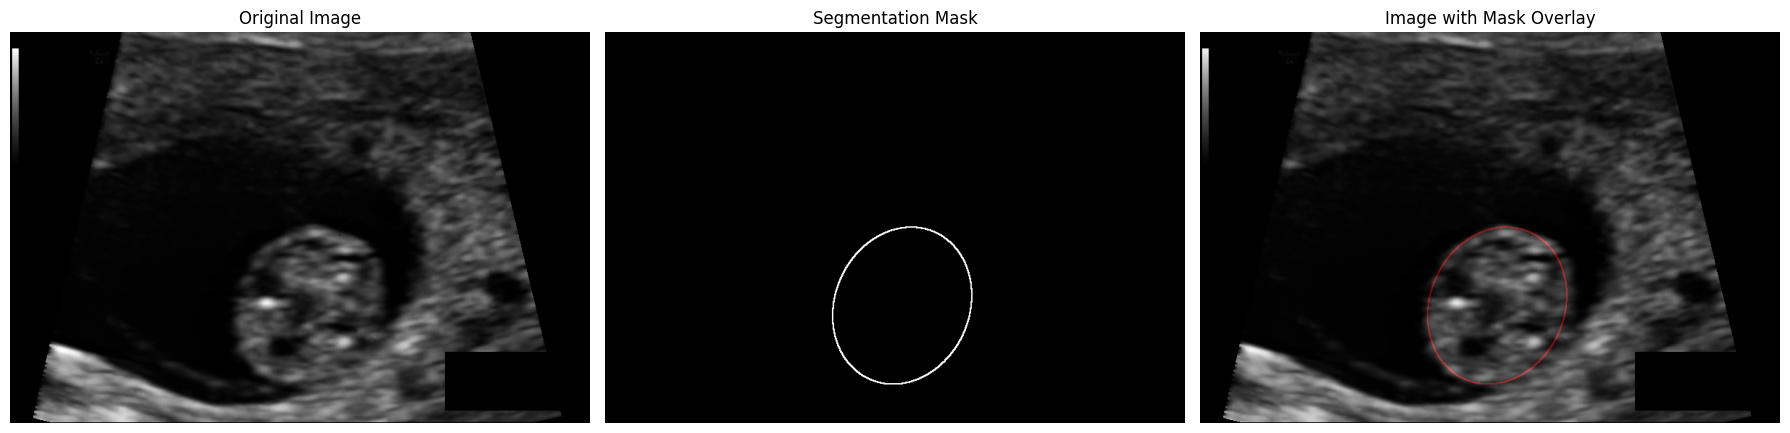


Sample 2:
Image: 001_HC.png
Mask: 001_HC_Annotation.png


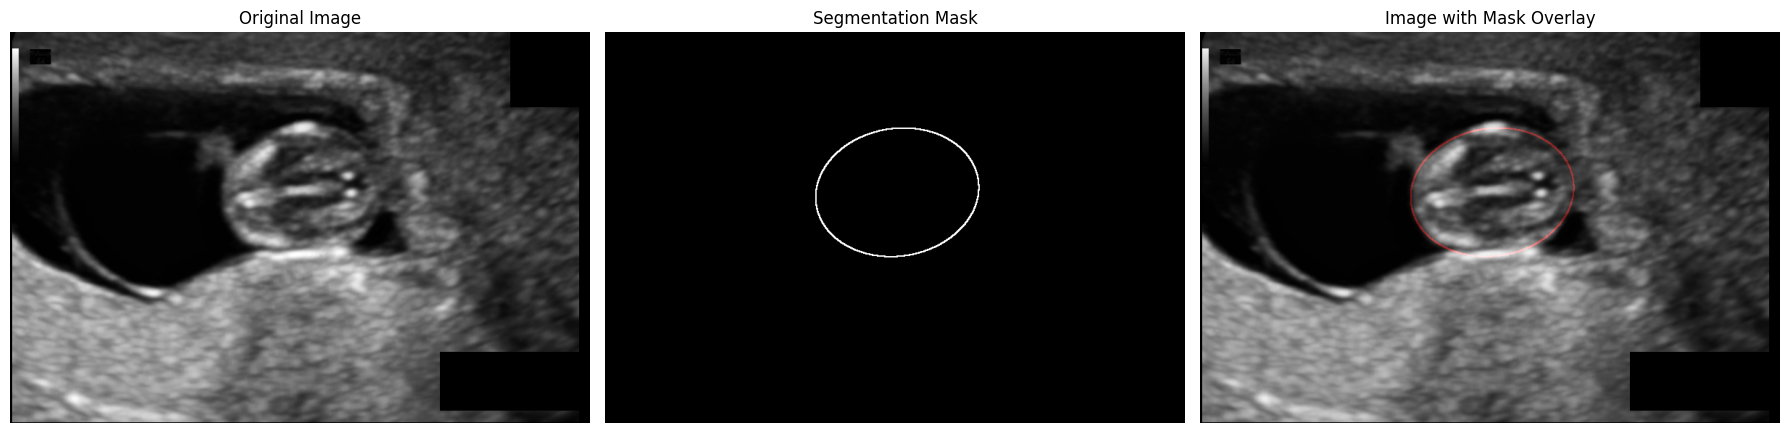


Sample 3:
Image: 002_HC.png
Mask: 002_HC_Annotation.png


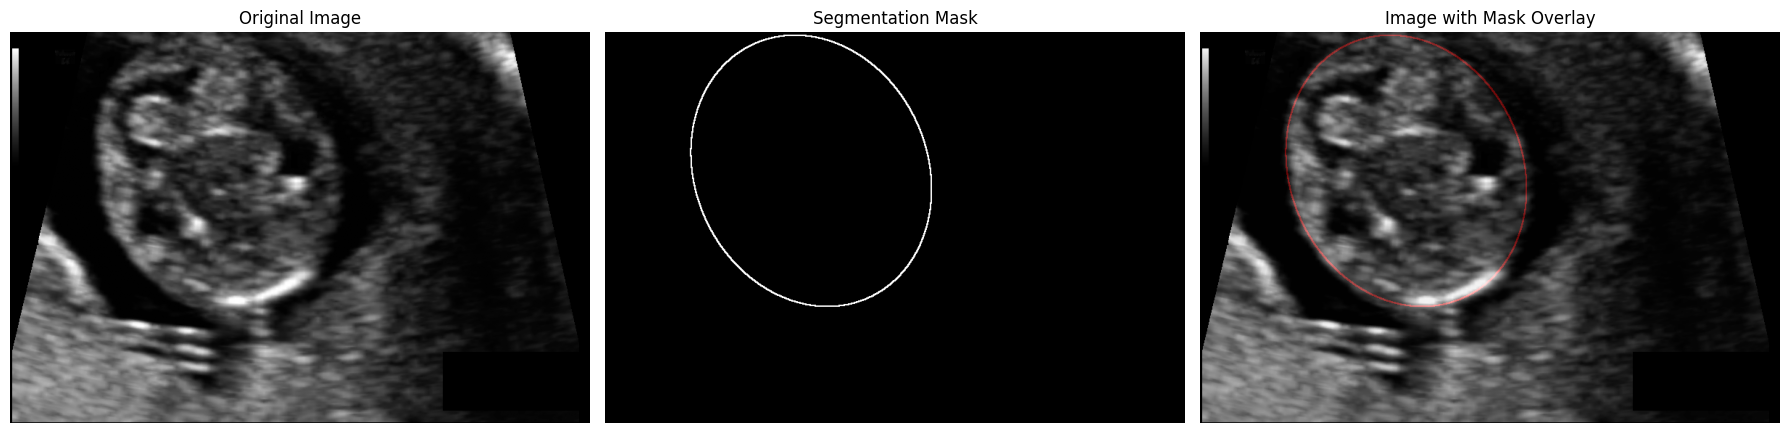

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob

# Set paths (modify if needed)
train_images_dir = '/content/data/train/images'
train_masks_dir = '/content/data/train/masks'

# Get sample images and masks
image_files = sorted(glob(os.path.join(train_images_dir, '*.png')))
mask_files = sorted(glob(os.path.join(train_masks_dir, '*_Annotation.png')))

# Verify we have matching pairs
if len(image_files) == 0 or len(mask_files) == 0:
    print("No images or masks found! Check your paths:")
    print(f"Images path: {train_images_dir}")
    print(f"Masks path: {train_masks_dir}")
else:
    print(f"Found {len(image_files)} images and {len(mask_files)} masks")

# Display function
def display_image_with_mask(image_path, mask_path, alpha=0.4):
    """Display image with mask overlay"""
    # Read images
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        print(f"Could not read {image_path} or {mask_path}")
        return

    # Create colored mask (red in this case)
    colored_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    colored_mask[mask > 0] = [255, 0, 0]  # Red color

    # Convert grayscale image to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Overlay mask
    overlayed = cv2.addWeighted(image_rgb, 1, colored_mask, alpha, 0)

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlayed)
    axes[2].set_title('Image with Mask Overlay')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Display first few samples
num_samples = min(3, len(image_files))
for i in range(num_samples):
    print(f"\nSample {i+1}:")
    print(f"Image: {os.path.basename(image_files[i])}")
    print(f"Mask: {os.path.basename(mask_files[i])}")
    display_image_with_mask(image_files[i], mask_files[i])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-3-6cf68fc2cc9d>:29: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
<ipython-input-3-6cf68fc2cc9d>:31: UserWarning: Argument(s) 'shift_limit' are not valid for transform OpticalDistortion
  A.OpticalDistortion(distort_limit=0.2, shift_limit=0.1, p=0.3),
<ipython-input-3-6cf68fc2cc9d>:34: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
<ipython-input-3-6cf68fc2cc9d>:36: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Found 999 images and 999 masks
Starting preprocessing...


100%|██████████| 999/999 [01:31<00:00, 10.97it/s]


Preprocessing completed!

Sample preprocessed result:


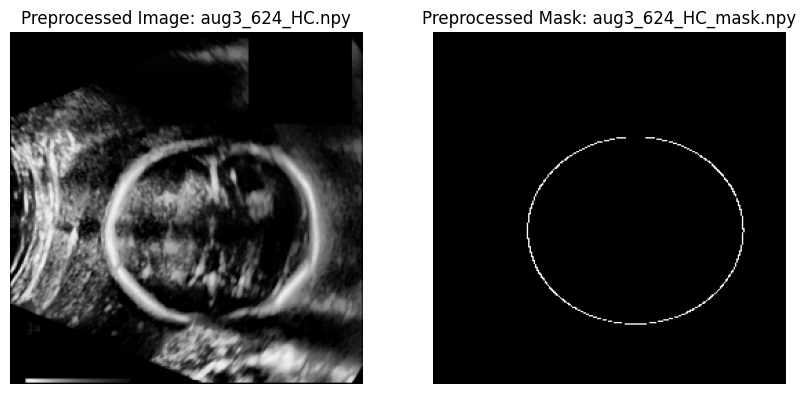

In [ ]:
import cv2
import numpy as np
import albumentations as A
from skimage import exposure
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Configuration
TARGET_SIZE = (256, 256)
INPUT_IMAGES_DIR = '/content/data/train/images'
INPUT_MASKS_DIR = '/content/data/train/masks'
OUTPUT_DIR = '/content/data/preprocessed'
AUGMENT = True  # Set to False to skip augmentation
NUM_AUGMENTATIONS = 5  # Increased number of augmented versions per image

# Create output directories
os.makedirs(os.path.join(OUTPUT_DIR, 'images'), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, 'masks'), exist_ok=True)

# Augmentation pipeline
augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Rotate(limit=45, p=0.5),
        A.Transpose(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
        A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.3),
        A.OpticalDistortion(distort_limit=0.2, shift_limit=0.1, p=0.3),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.RandomGamma(gamma_limit=(80, 120), p=0.3),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
        A.CLAHE(clip_limit=4.0, p=0.3),
        A.CoarseDropout(
            max_holes=8, max_height=16, max_width=16,
            min_holes=1, min_height=8, min_width=8,
            fill_value=0, p=0.3
        ),
    ],
    additional_targets={'mask': 'mask'}
)

def ensure_rgb(image):
    """Convert grayscale to RGB if needed"""
    if len(image.shape) == 2:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image

def preprocess_image(image_path, mask_path, save_prefix=''):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if image is None or mask is None:
        print(f"Failed to load {image_path} or {mask_path}")
        return None, None

    image = cv2.resize(image, TARGET_SIZE, interpolation=cv2.INTER_AREA)
    mask = cv2.resize(mask, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
    image_rgb = ensure_rgb(image)
    image_rgb = image_rgb.astype(np.float32) / 255.0
    mask = (mask > 0).astype(np.float32)

    if len(image_rgb.shape) == 3:
        image_rgb = np.stack([exposure.equalize_adapthist(image_rgb[..., i], clip_limit=0.03)
                              for i in range(3)], axis=-1)
    else:
        image_rgb = exposure.equalize_adapthist(image_rgb, clip_limit=0.03)

    base_name = os.path.basename(image_path).replace('.png', '')
    np.save(os.path.join(OUTPUT_DIR, 'images', f'{save_prefix}{base_name}.npy'), image_rgb)
    np.save(os.path.join(OUTPUT_DIR, 'masks', f'{save_prefix}{base_name}_mask.npy'), mask)

    return image_rgb, mask

# Process images
image_files = sorted([f for f in os.listdir(INPUT_IMAGES_DIR) if f.endswith('.png')])
mask_files = sorted([f for f in os.listdir(INPUT_MASKS_DIR) if f.endswith('.png')])

print(f"Found {len(image_files)} images and {len(mask_files)} masks")
print("Starting preprocessing...")

for img_file, mask_file in tqdm(zip(image_files, mask_files), total=len(image_files)):
    img_path = os.path.join(INPUT_IMAGES_DIR, img_file)
    mask_path = os.path.join(INPUT_MASKS_DIR, mask_file)
    image, mask = preprocess_image(img_path, mask_path)
    if image is None or mask is None:
        continue
    if AUGMENT:
        for i in range(NUM_AUGMENTATIONS):
            try:
                augmented = augmentation_pipeline(image=image, mask=mask)
                aug_img = augmented['image']
                aug_mask = (augmented['mask'] > 0.5).astype(np.float32)
                np.save(os.path.join(OUTPUT_DIR, 'images', f'aug{i}_{img_file.replace(".png", "")}.npy'), aug_img)
                np.save(os.path.join(OUTPUT_DIR, 'masks', f'aug{i}_{img_file.replace(".png", "")}_mask.npy'), aug_mask)
            except Exception as e:
                print(f"Error augmenting {img_file}: {str(e)}")
                continue

print("Preprocessing completed!")

# Visualization function
def visualize_sample():
    sample_images = sorted(os.listdir(os.path.join(OUTPUT_DIR, 'images')))
    sample_masks = sorted(os.listdir(os.path.join(OUTPUT_DIR, 'masks')))
    if not sample_images or not sample_masks:
        print("No processed images found!")
        return
    idx = np.random.randint(0, len(sample_images))
    image_path = os.path.join(OUTPUT_DIR, 'images', sample_images[idx])
    mask_path = os.path.join(OUTPUT_DIR, 'masks', sample_masks[idx])
    image = np.load(image_path)
    mask = np.load(mask_path)
    image = (image * 255).astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title(f"Preprocessed Image: {sample_images[idx]}")
    ax[0].axis('off')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f"Preprocessed Mask: {sample_masks[idx]}")
    ax[1].axis('off')
    plt.show()

print("\nSample preprocessed result:")
visualize_sample()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Constants
INPUT_SHAPE = (256, 256, 1)
BATCH_SIZE = 4
EPOCHS = 10
INIT_LR = 1e-4
NUM_FOLDS = 5
SEED = 42

# Data Generator
class SegmentationDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, mask_paths, batch_size=BATCH_SIZE, shuffle=True, augment=False):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_image_paths = self.image_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_mask_paths = self.mask_paths[index*self.batch_size:(index+1)*self.batch_size]

        images = []
        masks = []

        for img_path, mask_path in zip(batch_image_paths, batch_mask_paths):
            img = np.load(img_path)
            mask = np.load(mask_path)

            # Add channel dimension if needed
            img = np.expand_dims(img, axis=-1) if len(img.shape) == 2 else img
            mask = np.expand_dims(mask, axis=-1) if len(mask.shape) == 2 else mask

            # Simple augmentation
            if self.augment:
                img, mask = self.apply_augmentation(img, mask)

            images.append(img)
            masks.append(mask)

        return np.array(images), np.array(masks)

    def apply_augmentation(self, img, mask):
        # Random flip
        if np.random.rand() > 0.5:
            img = np.fliplr(img)
            mask = np.fliplr(mask)
        if np.random.rand() > 0.5:
            img = np.flipud(img)
            mask = np.flipud(mask)
        return img, mask

    def on_epoch_end(self):
        if self.shuffle:
            indices = np.arange(len(self.image_paths))
            np.random.shuffle(indices)
            self.image_paths = self.image_paths[indices]
            self.mask_paths = self.mask_paths[indices]

# Model Architecture
def build_hrnet(input_shape=(256, 256, 3), num_classes=1): # Change input shape to (256, 256, 3)
    inputs = tf.keras.Input(shape=input_shape)

    # Stem
    x = conv_block(inputs, 64, 3, 2)  # 128x128
    x = conv_block(x, 64, 3, 2)       # 64x64

    # Stage 1
    x = bottleneck_block(x, 256)

    # HRNet Stages
    x = hr_module(x, branches=2, filters=32)
    x = hr_module(x, branches=3, filters=64)
    x = hr_module(x, branches=4, filters=128)

    # Final layers
    x = conv_block(x, 256, 1)

    # Upsampling
    x = tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same')(x)  # 128x128
    x = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)    # 256x256

    # Output
    outputs = tf.keras.layers.Conv2D(num_classes, 1, activation='sigmoid')(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Building blocks
def conv_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation)(x)
    return x

def bottleneck_block(x, filters, strides=1):
    residual = x
    x = conv_block(x, filters//4, 1, strides)
    x = conv_block(x, filters//4, 3)
    x = conv_block(x, filters, 1, activation=None)

    if strides != 1 or residual.shape[-1] != filters:
        residual = conv_block(residual, filters, 1, strides, activation=None)

    x = tf.keras.layers.Add()([x, residual])
    return tf.keras.layers.Activation('relu')(x)

def hr_module(x, branches, filters):
    # Simplified HRModule implementation
    parallel_streams = []
    for i in range(branches):
        if i == 0:
            stream = x
        else:
            stream = tf.keras.layers.AveragePooling2D(pool_size=2**i)(x)
            stream = conv_block(stream, filters*(2**i))
            # Resize the stream to match the spatial dimensions of the first stream
            stream = tf.keras.layers.UpSampling2D(size=2**i, interpolation='bilinear')(stream)
        parallel_streams.append(stream)

    # Simple fusion (actual HRNet has more complex fusion)
    fused = tf.keras.layers.Concatenate()(parallel_streams)
    return conv_block(fused, filters)

# Metrics and Losses
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

# Training with Cross-Validation
def run_cross_validation(data_dir, output_dir='results'):
    os.makedirs(output_dir, exist_ok=True)

    # Load data paths
    image_paths = np.array(sorted([
        os.path.join(data_dir, 'images', f)
        for f in os.listdir(os.path.join(data_dir, 'images'))
        if f.endswith('.npy')
    ]))
    mask_paths = np.array(sorted([
        os.path.join(data_dir, 'masks', f)
        for f in os.listdir(os.path.join(data_dir, 'masks'))
        if f.endswith('.npy')
    ]))

    # Initialize KFold
    kfold = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)
    fold_histories = []
    fold_metrics = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(image_paths), 1):
        print(f"\n=== Training Fold {fold}/{NUM_FOLDS} ===")

        # Split data
        train_img, train_mask = image_paths[train_idx], mask_paths[train_idx]
        val_img, val_mask = image_paths[val_idx], mask_paths[val_idx]

        # Create generators
        train_gen = SegmentationDataGenerator(train_img, train_mask, augment=True)
        val_gen = SegmentationDataGenerator(val_img, val_mask, shuffle=False)

        # Build and compile model
        model = build_hrnet()
        model.compile(
            optimizer=Adam(learning_rate=INIT_LR),
            loss=bce_dice_loss,
            metrics=[dice_coef, 'accuracy']
        )

        # Callbacks
        callbacks = [
            ModelCheckpoint(
                os.path.join(output_dir, f'fold_{fold}_best_model.h5'),
                monitor='val_dice_coef',
                mode='max',
                save_best_only=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=1e-6,
                verbose=1
            ),
            EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=1
            ),
            CSVLogger(os.path.join(output_dir, f'fold_{fold}_history.csv'))
        ]

        # Train
        history = model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=EPOCHS,
            callbacks=callbacks,
            verbose=1
        )

        # Store results
        fold_histories.append(history)
        best_val_dice = max(history.history['val_dice_coef'])
        fold_metrics.append(best_val_dice)

        print(f"Fold {fold} completed. Best Val Dice: {best_val_dice:.4f}")

    # Print summary
    print("\n=== Cross-Validation Summary ===")
    for fold, metric in enumerate(fold_metrics, 1):
        print(f"Fold {fold}: Dice = {metric:.4f}")
    print(f"Mean Dice: {np.mean(fold_metrics):.4f} ± {np.std(fold_metrics):.4f}")

    return fold_histories

if __name__ == "__main__":
    data_directory = "/content/data/preprocessed"
    run_cross_validation(data_directory)


=== Training Fold 1/5 ===
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9746 - dice_coef: 0.1303 - loss: 0.9486
Epoch 1: val_dice_coef improved from -inf to 0.17788, saving model to results/fold_1_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 203s 141ms/step - accuracy: 0.9746 - dice_coef: 0.1303 - loss: 0.9485 - val_accuracy: 0.9834 - val_dice_coef: 0.1779 - val_loss: 0.8695 - learning_rate: 1.0000e-04
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9816 - dice_coef: 0.1954 - loss: 0.8526
Epoch 2: val_dice_coef improved from 0.17788 to 0.19925, saving model to results/fold_1_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.9816 - dice_coef: 0.1954 - loss: 0.8526 - val_accuracy: 0.9814 - val_dice_coef: 0.1993 - val_loss: 0.8510 - learning_rate: 1.0000e-04
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9817 - dice_coef: 0.2055 - loss: 0.8422
Epoch 3: val_dice_coef improved from 0.19925 to 0.19985, saving model to results/fold_1_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 150s 126ms/step - accuracy: 0.9817 - dice_coef: 0.2055 - loss: 0.8422 - val_accuracy: 0.9811 - val_dice_coef: 0.1998 - val_loss: 0.8516 - learning_rate: 1.0000e-04
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9820 - dice_coef: 0.2127 - loss: 0.8343
Epoch 4: val_dice_coef improved from 0.19985 to 0.20665, saving model to results/fold_1_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9820 - dice_coef: 0.2127 - loss: 0.8343 - val_accuracy: 0.9812 - val_dice_coef: 0.2066 - val_loss: 0.8407 - learning_rate: 1.0000e-04
Epoch 5/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9819 - dice_coef: 0.2151 - loss: 0.8318
Epoch 5: val_dice_coef did not improve from 0.20665
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9819 - dice_coef: 0.2151 - loss: 0.8318 - val_accuracy: 0.9817 - val_dice_coef: 0.2017 - val_loss: 0.8460 - learning_rate: 1.0000e-04
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9822 - dice_coef: 0.2193 - loss: 0.8274
Epoch 6: val_dice_coef did not improve from 0.20665
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9822 - dice_coef: 0.2193 - loss: 0.8274 - val_accuracy: 0.9830 - val_dice_coef: 0.1935 - val_loss: 0.8525 - learning_rate: 1.0000e-04
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9823 - dice_coef: 0.2

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9823 - dice_coef: 0.2234 - loss: 0.8230 - val_accuracy: 0.9829 - val_dice_coef: 0.2140 - val_loss: 0.8325 - learning_rate: 1.0000e-04
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9826 - dice_coef: 0.2264 - loss: 0.8199
Epoch 8: val_dice_coef did not improve from 0.21396
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9826 - dice_coef: 0.2264 - loss: 0.8199 - val_accuracy: 0.9832 - val_dice_coef: 0.2121 - val_loss: 0.8321 - learning_rate: 1.0000e-04
Epoch 9/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9826 - dice_coef: 0.2289 - loss: 0.8173
Epoch 9: val_dice_coef did not improve from 0.21396
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 203s 120ms/step - accuracy: 0.9826 - dice_coef: 0.2289 - loss: 0.8173 - val_accuracy: 0.9835 - val_dice_coef: 0.2137 - val_loss: 0.8304 - learning_rate: 1.0000e-04
Epoch 10/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9827 - dice_coef: 0.

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9827 - dice_coef: 0.2311 - loss: 0.8152 - val_accuracy: 0.9822 - val_dice_coef: 0.2200 - val_loss: 0.8269 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
Fold 1 completed. Best Val Dice: 0.2200

=== Training Fold 2/5 ===
Epoch 1/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9767 - dice_coef: 0.1306 - loss: 0.9459
Epoch 1: val_dice_coef improved from -inf to 0.18569, saving model to results/fold_2_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 188s 134ms/step - accuracy: 0.9767 - dice_coef: 0.1306 - loss: 0.9458 - val_accuracy: 0.9786 - val_dice_coef: 0.1857 - val_loss: 0.8706 - learning_rate: 1.0000e-04
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9816 - dice_coef: 0.2000 - loss: 0.8479
Epoch 2: val_dice_coef did not improve from 0.18569
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9816 - dice_coef: 0.2000 - loss: 0.8479 - val_accuracy: 0.9817 - val_dice_coef: 0.1852 - val_loss: 0.8642 - learning_rate: 1.0000e-04
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9818 - dice_coef: 0.2064 - loss: 0.8411
Epoch 3: val_dice_coef did not improve from 0.18569
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 202s 120ms/step - accuracy: 0.9818 - dice_coef: 0.2064 - loss: 0.8411 - val_accuracy: 0.9839 - val_dice_coef: 0.1658 - val_loss: 0.8811 - learning_rate: 1.0000e-04
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9821 - dice_coef: 0.2

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 152s 127ms/step - accuracy: 0.9822 - dice_coef: 0.2170 - loss: 0.8298 - val_accuracy: 0.9816 - val_dice_coef: 0.2011 - val_loss: 0.8484 - learning_rate: 1.0000e-04
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9822 - dice_coef: 0.2202 - loss: 0.8265
Epoch 6: val_dice_coef improved from 0.20108 to 0.20965, saving model to results/fold_2_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 144s 120ms/step - accuracy: 0.9822 - dice_coef: 0.2202 - loss: 0.8265 - val_accuracy: 0.9809 - val_dice_coef: 0.2097 - val_loss: 0.8405 - learning_rate: 1.0000e-04
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9824 - dice_coef: 0.2234 - loss: 0.8232
Epoch 7: val_dice_coef did not improve from 0.20965
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2234 - loss: 0.8232 - val_accuracy: 0.9832 - val_dice_coef: 0.2062 - val_loss: 0.8390 - learning_rate: 1.0000e-04
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9825 - dice_coef: 0.2267 - loss: 0.8196
Epoch 8: val_dice_coef improved from 0.20965 to 0.21551, saving model to results/fold_2_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 152s 126ms/step - accuracy: 0.9825 - dice_coef: 0.2267 - loss: 0.8196 - val_accuracy: 0.9818 - val_dice_coef: 0.2155 - val_loss: 0.8327 - learning_rate: 1.0000e-04
Epoch 9/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9824 - dice_coef: 0.2284 - loss: 0.8181
Epoch 9: val_dice_coef did not improve from 0.21551
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2284 - loss: 0.8181 - val_accuracy: 0.9839 - val_dice_coef: 0.1983 - val_loss: 0.8467 - learning_rate: 1.0000e-04
Epoch 10/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9828 - dice_coef: 0.2331 - loss: 0.8129
Epoch 10: val_dice_coef did not improve from 0.21551
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9828 - dice_coef: 0.2331 - loss: 0.8129 - val_accuracy: 0.9847 - val_dice_coef: 0.2041 - val_loss: 0.8398 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 8.
Fold 2 completed. Best Val Dic

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 183s 132ms/step - accuracy: 0.9770 - dice_coef: 0.1318 - loss: 0.9455 - val_accuracy: 0.9817 - val_dice_coef: 0.1856 - val_loss: 0.8618 - learning_rate: 1.0000e-04
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9815 - dice_coef: 0.1963 - loss: 0.8515
Epoch 2: val_dice_coef improved from 0.18563 to 0.19811, saving model to results/fold_3_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9815 - dice_coef: 0.1963 - loss: 0.8515 - val_accuracy: 0.9815 - val_dice_coef: 0.1981 - val_loss: 0.8469 - learning_rate: 1.0000e-04
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9817 - dice_coef: 0.2060 - loss: 0.8416
Epoch 3: val_dice_coef improved from 0.19811 to 0.20622, saving model to results/fold_3_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 202s 119ms/step - accuracy: 0.9817 - dice_coef: 0.2060 - loss: 0.8416 - val_accuracy: 0.9806 - val_dice_coef: 0.2062 - val_loss: 0.8417 - learning_rate: 1.0000e-04
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9819 - dice_coef: 0.2098 - loss: 0.8373
Epoch 4: val_dice_coef did not improve from 0.20622
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.9819 - dice_coef: 0.2098 - loss: 0.8373 - val_accuracy: 0.9822 - val_dice_coef: 0.2009 - val_loss: 0.8473 - learning_rate: 1.0000e-04
Epoch 5/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9820 - dice_coef: 0.2142 - loss: 0.8328
Epoch 5: val_dice_coef improved from 0.20622 to 0.21343, saving model to results/fold_3_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9820 - dice_coef: 0.2142 - loss: 0.8328 - val_accuracy: 0.9822 - val_dice_coef: 0.2134 - val_loss: 0.8308 - learning_rate: 1.0000e-04
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9822 - dice_coef: 0.2188 - loss: 0.8276
Epoch 6: val_dice_coef did not improve from 0.21343
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 150s 125ms/step - accuracy: 0.9822 - dice_coef: 0.2188 - loss: 0.8276 - val_accuracy: 0.9833 - val_dice_coef: 0.2119 - val_loss: 0.8330 - learning_rate: 1.0000e-04
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9824 - dice_coef: 0.2222 - loss: 0.8242
Epoch 7: val_dice_coef did not improve from 0.21343
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 150s 125ms/step - accuracy: 0.9824 - dice_coef: 0.2222 - loss: 0.8242 - val_accuracy: 0.9841 - val_dice_coef: 0.2024 - val_loss: 0.8410 - learning_rate: 1.0000e-04
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9823 - dice_coef: 0.2

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9827 - dice_coef: 0.2276 - loss: 0.8185 - val_accuracy: 0.9820 - val_dice_coef: 0.2210 - val_loss: 0.8264 - learning_rate: 1.0000e-04
Epoch 10/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9828 - dice_coef: 0.2293 - loss: 0.8164
Epoch 10: val_dice_coef improved from 0.22097 to 0.22511, saving model to results/fold_3_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 151s 126ms/step - accuracy: 0.9828 - dice_coef: 0.2293 - loss: 0.8164 - val_accuracy: 0.9821 - val_dice_coef: 0.2251 - val_loss: 0.8217 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
Fold 3 completed. Best Val Dice: 0.2251

=== Training Fold 4/5 ===
Epoch 1/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9783 - dice_coef: 0.1286 - loss: 0.9470
Epoch 1: val_dice_coef improved from -inf to 0.17109, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 183s 132ms/step - accuracy: 0.9783 - dice_coef: 0.1286 - loss: 0.9470 - val_accuracy: 0.9844 - val_dice_coef: 0.1711 - val_loss: 0.8747 - learning_rate: 1.0000e-04
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9815 - dice_coef: 0.1975 - loss: 0.8504
Epoch 2: val_dice_coef improved from 0.17109 to 0.19017, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9815 - dice_coef: 0.1975 - loss: 0.8504 - val_accuracy: 0.9807 - val_dice_coef: 0.1902 - val_loss: 0.8623 - learning_rate: 1.0000e-04
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9816 - dice_coef: 0.2070 - loss: 0.8407
Epoch 3: val_dice_coef improved from 0.19017 to 0.19297, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9816 - dice_coef: 0.2070 - loss: 0.8407 - val_accuracy: 0.9826 - val_dice_coef: 0.1930 - val_loss: 0.8524 - learning_rate: 1.0000e-04
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9820 - dice_coef: 0.2139 - loss: 0.8332
Epoch 4: val_dice_coef improved from 0.19297 to 0.19754, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9820 - dice_coef: 0.2139 - loss: 0.8332 - val_accuracy: 0.9817 - val_dice_coef: 0.1975 - val_loss: 0.8494 - learning_rate: 1.0000e-04
Epoch 5/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9822 - dice_coef: 0.2182 - loss: 0.8285
Epoch 5: val_dice_coef improved from 0.19754 to 0.20116, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 203s 120ms/step - accuracy: 0.9822 - dice_coef: 0.2182 - loss: 0.8285 - val_accuracy: 0.9814 - val_dice_coef: 0.2012 - val_loss: 0.8463 - learning_rate: 1.0000e-04
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9824 - dice_coef: 0.2226 - loss: 0.8238
Epoch 6: val_dice_coef improved from 0.20116 to 0.20697, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2226 - loss: 0.8238 - val_accuracy: 0.9828 - val_dice_coef: 0.2070 - val_loss: 0.8400 - learning_rate: 1.0000e-04
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9824 - dice_coef: 0.2237 - loss: 0.8228
Epoch 7: val_dice_coef improved from 0.20697 to 0.20794, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2237 - loss: 0.8228 - val_accuracy: 0.9823 - val_dice_coef: 0.2079 - val_loss: 0.8381 - learning_rate: 1.0000e-04
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9824 - dice_coef: 0.2258 - loss: 0.8205
Epoch 8: val_dice_coef did not improve from 0.20794
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2258 - loss: 0.8205 - val_accuracy: 0.9844 - val_dice_coef: 0.2048 - val_loss: 0.8381 - learning_rate: 1.0000e-04
Epoch 9/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9828 - dice_coef: 0.2295 - loss: 0.8166
Epoch 9: val_dice_coef improved from 0.20794 to 0.21194, saving model to results/fold_4_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 151s 126ms/step - accuracy: 0.9828 - dice_coef: 0.2295 - loss: 0.8166 - val_accuracy: 0.9842 - val_dice_coef: 0.2119 - val_loss: 0.8324 - learning_rate: 1.0000e-04
Epoch 10/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9829 - dice_coef: 0.2343 - loss: 0.8116
Epoch 10: val_dice_coef did not improve from 0.21194
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9829 - dice_coef: 0.2343 - loss: 0.8116 - val_accuracy: 0.9836 - val_dice_coef: 0.1915 - val_loss: 0.8546 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 9.
Fold 4 completed. Best Val Dice: 0.2119

=== Training Fold 5/5 ===
Epoch 1/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9764 - dice_coef: 0.1316 - loss: 0.9453
Epoch 1: val_dice_coef improved from -inf to 0.18461, saving model to results/fold_5_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 177s 127ms/step - accuracy: 0.9764 - dice_coef: 0.1316 - loss: 0.9453 - val_accuracy: 0.9806 - val_dice_coef: 0.1846 - val_loss: 0.8657 - learning_rate: 1.0000e-04
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9817 - dice_coef: 0.1975 - loss: 0.8502
Epoch 2: val_dice_coef did not improve from 0.18461
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9817 - dice_coef: 0.1975 - loss: 0.8502 - val_accuracy: 0.9844 - val_dice_coef: 0.1811 - val_loss: 0.8616 - learning_rate: 1.0000e-04
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9817 - dice_coef: 0.2081 - loss: 0.8393
Epoch 3: val_dice_coef improved from 0.18461 to 0.19705, saving model to results/fold_5_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 211s 126ms/step - accuracy: 0.9817 - dice_coef: 0.2081 - loss: 0.8393 - val_accuracy: 0.9822 - val_dice_coef: 0.1971 - val_loss: 0.8513 - learning_rate: 1.0000e-04
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9819 - dice_coef: 0.2123 - loss: 0.8348
Epoch 4: val_dice_coef improved from 0.19705 to 0.20223, saving model to results/fold_5_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 194s 120ms/step - accuracy: 0.9819 - dice_coef: 0.2123 - loss: 0.8348 - val_accuracy: 0.9832 - val_dice_coef: 0.2022 - val_loss: 0.8429 - learning_rate: 1.0000e-04
Epoch 5/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9819 - dice_coef: 0.2172 - loss: 0.8298
Epoch 5: val_dice_coef improved from 0.20223 to 0.21253, saving model to results/fold_5_best_model.h5


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.9819 - dice_coef: 0.2172 - loss: 0.8298 - val_accuracy: 0.9813 - val_dice_coef: 0.2125 - val_loss: 0.8389 - learning_rate: 1.0000e-04
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9822 - dice_coef: 0.2222 - loss: 0.8245
Epoch 6: val_dice_coef did not improve from 0.21253
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9822 - dice_coef: 0.2222 - loss: 0.8245 - val_accuracy: 0.9813 - val_dice_coef: 0.2050 - val_loss: 0.8446 - learning_rate: 1.0000e-04
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9824 - dice_coef: 0.2235 - loss: 0.8229
Epoch 7: val_dice_coef did not improve from 0.21253
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9824 - dice_coef: 0.2235 - loss: 0.8229 - val_accuracy: 0.9842 - val_dice_coef: 0.2030 - val_loss: 0.8411 - learning_rate: 1.0000e-04
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9823 - dice_coef: 0.2

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.9828 - dice_coef: 0.2323 - loss: 0.8138 - val_accuracy: 0.9827 - val_dice_coef: 0.2188 - val_loss: 0.8276 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
Fold 5 completed. Best Val Dice: 0.2188

=== Cross-Validation Summary ===
Fold 1: Dice = 0.2200
Fold 2: Dice = 0.2155
Fold 3: Dice = 0.2251
Fold 4: Dice = 0.2119
Fold 5: Dice = 0.2188
Mean Dice: 0.2183 ± 0.0044


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved best model (Fold 3) to Drive with val_dice_coef: 0.2251


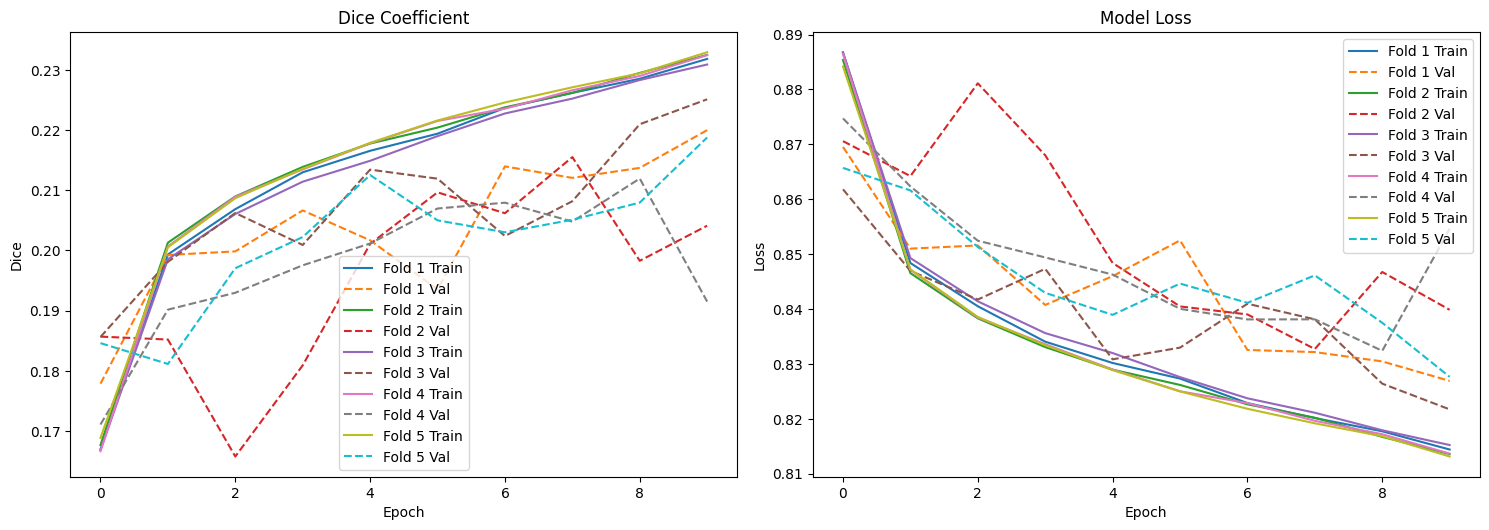


=== Training Summary ===
Fold 1: Best Val Dice 0.2200 at epoch 10
Fold 2: Best Val Dice 0.2155 at epoch 8
Fold 3: Best Val Dice 0.2251 at epoch 10
Fold 4: Best Val Dice 0.2119 at epoch 9
Fold 5: Best Val Dice 0.2188 at epoch 10


In [ ]:
import shutil
import matplotlib.pyplot as plt
from google.colab import drive

# 1. Mount Google Drive (run this first)
drive.mount('/content/drive')

# 2. Function to save best model to Drive
def save_best_model_to_drive(local_results_dir='/content/results', drive_dir='/content/drive/MyDrive/HRNet_Models'):
    # Create directory in Drive if it doesn't exist
    os.makedirs(drive_dir, exist_ok=True)

    # Find the best model from cross-validation
    best_fold = None
    best_dice = 0

    for fold in range(1, NUM_FOLDS+1):
        history_file = os.path.join(local_results_dir, f'fold_{fold}_history.csv')
        if os.path.exists(history_file):
            history = pd.read_csv(history_file)
            max_dice = history['val_dice_coef'].max()
            if max_dice > best_dice:
                best_dice = max_dice
                best_fold = fold

    if best_fold:
        # Copy best model and its history
        model_file = os.path.join(local_results_dir, f'fold_{best_fold}_best_model.h5')
        history_file = os.path.join(local_results_dir, f'fold_{best_fold}_history.csv')

        shutil.copy(model_file, drive_dir)
        shutil.copy(history_file, drive_dir)
        print(f"Saved best model (Fold {best_fold}) to Drive with val_dice_coef: {best_dice:.4f}")
    else:
        print("No models found to save")

# 3. Function to plot training results
def plot_training_results(results_dir='/content/results'):
    plt.figure(figsize=(15, 10))

    for fold in range(1, NUM_FOLDS+1):
        history_file = os.path.join(results_dir, f'fold_{fold}_history.csv')
        if os.path.exists(history_file):
            history = pd.read_csv(history_file)

            # Plot training and validation dice
            plt.subplot(2, 2, 1)
            plt.plot(history['dice_coef'], label=f'Fold {fold} Train')
            plt.plot(history['val_dice_coef'], '--', label=f'Fold {fold} Val')
            plt.title('Dice Coefficient')
            plt.ylabel('Dice')
            plt.xlabel('Epoch')
            plt.legend()

            # Plot training and validation loss
            plt.subplot(2, 2, 2)
            plt.plot(history['loss'], label=f'Fold {fold} Train')
            plt.plot(history['val_loss'], '--', label=f'Fold {fold} Val')
            plt.title('Model Loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend()

            # Plot learning rate
            if 'lr' in history.columns:
                plt.subplot(2, 2, 3)
                plt.plot(history['lr'], label=f'Fold {fold}')
                plt.title('Learning Rate')
                plt.ylabel('LR')
                plt.xlabel('Epoch')
                plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\n=== Training Summary ===")
    for fold in range(1, NUM_FOLDS+1):
        history_file = os.path.join(results_dir, f'fold_{fold}_history.csv')
        if os.path.exists(history_file):
            history = pd.read_csv(history_file)
            best_epoch = history['val_dice_coef'].idxmax() + 1
            print(f"Fold {fold}: Best Val Dice {history['val_dice_coef'].max():.4f} at epoch {best_epoch}")

# 4. Run the functions (after you've trained your models)
save_best_model_to_drive()
plot_training_results()

Checking test directory: /content/data/test/images
Found 335 test images

Loading model from: /content/results/fold_3_best_model.h5


Processing test images:   0%|          | 0/335 [00:00<?, ?it/s]


Processing: /content/data/test/images/013_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Processing test images:   0%|          | 1/335 [00:06<36:27,  6.55s/it]


Processing: /content/data/test/images/033_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:   1%|          | 2/335 [00:06<15:24,  2.78s/it]


Processing: /content/data/test/images/064_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   1%|          | 3/335 [00:06<08:40,  1.57s/it]


Processing: /content/data/test/images/210_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   1%|          | 4/335 [00:06<05:30,  1.00it/s]


Processing: /content/data/test/images/246_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   1%|▏         | 5/335 [00:07<03:43,  1.48it/s]


Processing: /content/data/test/images/222_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   2%|▏         | 6/335 [00:07<02:41,  2.04it/s]


Processing: /content/data/test/images/328_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   2%|▏         | 7/335 [00:07<02:01,  2.70it/s]


Processing: /content/data/test/images/113_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   2%|▏         | 8/335 [00:07<01:35,  3.42it/s]


Processing: /content/data/test/images/255_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:   3%|▎         | 9/335 [00:07<01:15,  4.29it/s]


Processing: /content/data/test/images/198_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   3%|▎         | 10/335 [00:07<01:04,  5.03it/s]


Processing: /content/data/test/images/277_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:   3%|▎         | 11/335 [00:07<00:58,  5.57it/s]


Processing: /content/data/test/images/116_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:   4%|▎         | 12/335 [00:07<00:50,  6.37it/s]


Processing: /content/data/test/images/160_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:   4%|▍         | 13/335 [00:08<00:47,  6.77it/s]


Processing: /content/data/test/images/161_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   4%|▍         | 14/335 [00:08<00:45,  7.09it/s]


Processing: /content/data/test/images/327_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   4%|▍         | 15/335 [00:08<00:42,  7.51it/s]


Processing: /content/data/test/images/079_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   5%|▍         | 16/335 [00:08<00:42,  7.58it/s]


Processing: /content/data/test/images/061_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   5%|▌         | 17/335 [00:08<00:39,  8.05it/s]


Processing: /content/data/test/images/188_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   5%|▌         | 18/335 [00:08<00:37,  8.45it/s]


Processing: /content/data/test/images/052_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:   6%|▌         | 19/335 [00:08<00:35,  8.79it/s]


Processing: /content/data/test/images/002_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   6%|▌         | 20/335 [00:08<00:38,  8.12it/s]


Processing: /content/data/test/images/128_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   6%|▋         | 21/335 [00:08<00:36,  8.53it/s]


Processing: /content/data/test/images/227_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   7%|▋         | 22/335 [00:09<00:36,  8.67it/s]


Processing: /content/data/test/images/127_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:   7%|▋         | 23/335 [00:09<00:35,  8.86it/s]


Processing: /content/data/test/images/223_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   7%|▋         | 24/335 [00:09<00:34,  8.97it/s]


Processing: /content/data/test/images/123_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:   7%|▋         | 25/335 [00:09<00:33,  9.15it/s]


Processing: /content/data/test/images/330_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   8%|▊         | 26/335 [00:09<00:33,  9.17it/s]


Processing: /content/data/test/images/068_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:   8%|▊         | 27/335 [00:09<00:33,  9.22it/s]


Processing: /content/data/test/images/132_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   8%|▊         | 28/335 [00:09<00:32,  9.32it/s]


Processing: /content/data/test/images/096_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:   9%|▊         | 29/335 [00:09<00:35,  8.69it/s]


Processing: /content/data/test/images/329_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:   9%|▉         | 30/335 [00:09<00:34,  8.88it/s]


Processing: /content/data/test/images/046_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:   9%|▉         | 31/335 [00:10<00:35,  8.59it/s]


Processing: /content/data/test/images/150_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  10%|▉         | 32/335 [00:10<00:34,  8.78it/s]


Processing: /content/data/test/images/253_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  10%|▉         | 33/335 [00:10<00:35,  8.46it/s]


Processing: /content/data/test/images/136_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  10%|█         | 34/335 [00:10<00:36,  8.34it/s]


Processing: /content/data/test/images/070_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test images:  10%|█         | 35/335 [00:10<00:36,  8.26it/s]


Processing: /content/data/test/images/237_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  11%|█         | 36/335 [00:10<00:34,  8.56it/s]


Processing: /content/data/test/images/169_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  11%|█         | 37/335 [00:10<00:35,  8.40it/s]


Processing: /content/data/test/images/172_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  11%|█▏        | 38/335 [00:10<00:35,  8.26it/s]


Processing: /content/data/test/images/111_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  12%|█▏        | 39/335 [00:11<00:36,  8.07it/s]


Processing: /content/data/test/images/107_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  12%|█▏        | 40/335 [00:11<00:36,  7.98it/s]


Processing: /content/data/test/images/115_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  12%|█▏        | 41/335 [00:11<00:35,  8.19it/s]


Processing: /content/data/test/images/081_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  13%|█▎        | 42/335 [00:11<00:34,  8.44it/s]


Processing: /content/data/test/images/158_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  13%|█▎        | 43/335 [00:11<00:35,  8.30it/s]


Processing: /content/data/test/images/288_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  13%|█▎        | 44/335 [00:11<00:35,  8.22it/s]


Processing: /content/data/test/images/296_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  13%|█▎        | 45/335 [00:11<00:33,  8.58it/s]


Processing: /content/data/test/images/275_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  14%|█▎        | 46/335 [00:11<00:33,  8.59it/s]


Processing: /content/data/test/images/016_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  14%|█▍        | 47/335 [00:11<00:34,  8.38it/s]


Processing: /content/data/test/images/027_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  14%|█▍        | 48/335 [00:12<00:34,  8.25it/s]


Processing: /content/data/test/images/063_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  15%|█▍        | 49/335 [00:12<00:33,  8.46it/s]


Processing: /content/data/test/images/099_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  15%|█▍        | 50/335 [00:12<00:34,  8.33it/s]


Processing: /content/data/test/images/106_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  15%|█▌        | 51/335 [00:12<00:33,  8.45it/s]


Processing: /content/data/test/images/119_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  16%|█▌        | 52/335 [00:12<00:34,  8.19it/s]


Processing: /content/data/test/images/152_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  16%|█▌        | 53/335 [00:12<00:35,  7.94it/s]


Processing: /content/data/test/images/280_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  16%|█▌        | 54/335 [00:12<00:34,  8.20it/s]


Processing: /content/data/test/images/261_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  16%|█▋        | 55/335 [00:12<00:34,  8.01it/s]


Processing: /content/data/test/images/174_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing test images:  17%|█▋        | 56/335 [00:13<00:37,  7.49it/s]


Processing: /content/data/test/images/304_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test images:  17%|█▋        | 57/335 [00:13<00:39,  7.13it/s]


Processing: /content/data/test/images/025_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing test images:  17%|█▋        | 58/335 [00:13<00:39,  6.98it/s]


Processing: /content/data/test/images/088_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing test images:  18%|█▊        | 59/335 [00:13<00:39,  6.91it/s]


Processing: /content/data/test/images/236_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test images:  18%|█▊        | 60/335 [00:13<00:40,  6.87it/s]


Processing: /content/data/test/images/180_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test images:  18%|█▊        | 61/335 [00:13<00:39,  6.88it/s]


Processing: /content/data/test/images/007_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  19%|█▊        | 62/335 [00:14<00:40,  6.68it/s]


Processing: /content/data/test/images/066_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  19%|█▉        | 63/335 [00:14<00:39,  6.87it/s]


Processing: /content/data/test/images/071_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  19%|█▉        | 64/335 [00:14<00:38,  6.97it/s]


Processing: /content/data/test/images/029_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing test images:  19%|█▉        | 65/335 [00:14<00:39,  6.86it/s]


Processing: /content/data/test/images/101_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  20%|█▉        | 66/335 [00:14<00:39,  6.90it/s]


Processing: /content/data/test/images/085_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  20%|██        | 67/335 [00:14<00:38,  7.01it/s]


Processing: /content/data/test/images/321_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing test images:  20%|██        | 68/335 [00:14<00:39,  6.85it/s]


Processing: /content/data/test/images/225_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing test images:  21%|██        | 69/335 [00:15<00:40,  6.59it/s]


Processing: /content/data/test/images/073_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  21%|██        | 70/335 [00:15<00:40,  6.51it/s]


Processing: /content/data/test/images/032_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing test images:  21%|██        | 71/335 [00:15<00:40,  6.50it/s]


Processing: /content/data/test/images/038_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  21%|██▏       | 72/335 [00:15<00:40,  6.42it/s]


Processing: /content/data/test/images/044_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing test images:  22%|██▏       | 73/335 [00:15<00:40,  6.39it/s]


Processing: /content/data/test/images/186_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  22%|██▏       | 74/335 [00:15<00:40,  6.45it/s]


Processing: /content/data/test/images/142_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing test images:  22%|██▏       | 75/335 [00:16<00:41,  6.31it/s]


Processing: /content/data/test/images/263_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  23%|██▎       | 76/335 [00:16<00:41,  6.31it/s]


Processing: /content/data/test/images/233_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing test images:  23%|██▎       | 77/335 [00:16<00:41,  6.15it/s]


Processing: /content/data/test/images/020_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  23%|██▎       | 78/335 [00:16<00:38,  6.72it/s]


Processing: /content/data/test/images/163_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  24%|██▎       | 79/335 [00:16<00:36,  7.09it/s]


Processing: /content/data/test/images/072_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  24%|██▍       | 80/335 [00:16<00:35,  7.21it/s]


Processing: /content/data/test/images/005_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  24%|██▍       | 81/335 [00:16<00:34,  7.37it/s]


Processing: /content/data/test/images/091_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  24%|██▍       | 82/335 [00:16<00:33,  7.66it/s]


Processing: /content/data/test/images/299_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  25%|██▍       | 83/335 [00:17<00:31,  8.06it/s]


Processing: /content/data/test/images/047_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  25%|██▌       | 84/335 [00:17<00:30,  8.36it/s]


Processing: /content/data/test/images/184_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  25%|██▌       | 85/335 [00:17<00:30,  8.30it/s]


Processing: /content/data/test/images/146_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  26%|██▌       | 86/335 [00:17<00:30,  8.11it/s]


Processing: /content/data/test/images/269_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  26%|██▌       | 87/335 [00:17<00:29,  8.31it/s]


Processing: /content/data/test/images/028_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  26%|██▋       | 88/335 [00:17<00:29,  8.45it/s]


Processing: /content/data/test/images/214_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  27%|██▋       | 89/335 [00:17<00:29,  8.31it/s]


Processing: /content/data/test/images/324_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  27%|██▋       | 90/335 [00:17<00:28,  8.54it/s]


Processing: /content/data/test/images/224_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  27%|██▋       | 91/335 [00:17<00:28,  8.68it/s]


Processing: /content/data/test/images/245_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test images:  27%|██▋       | 92/335 [00:18<00:29,  8.30it/s]


Processing: /content/data/test/images/315_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  28%|██▊       | 93/335 [00:18<00:29,  8.22it/s]


Processing: /content/data/test/images/283_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  28%|██▊       | 94/335 [00:18<00:29,  8.16it/s]


Processing: /content/data/test/images/129_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  28%|██▊       | 95/335 [00:18<00:30,  7.97it/s]


Processing: /content/data/test/images/298_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  29%|██▊       | 96/335 [00:18<00:28,  8.34it/s]


Processing: /content/data/test/images/042_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  29%|██▉       | 97/335 [00:18<00:28,  8.22it/s]


Processing: /content/data/test/images/243_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  29%|██▉       | 98/335 [00:18<00:29,  8.09it/s]


Processing: /content/data/test/images/235_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  30%|██▉       | 99/335 [00:18<00:28,  8.25it/s]


Processing: /content/data/test/images/149_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  30%|██▉       | 100/335 [00:19<00:29,  8.06it/s]


Processing: /content/data/test/images/130_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  30%|███       | 101/335 [00:19<00:28,  8.20it/s]


Processing: /content/data/test/images/197_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  30%|███       | 102/335 [00:19<00:27,  8.35it/s]


Processing: /content/data/test/images/098_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  31%|███       | 103/335 [00:19<00:27,  8.54it/s]


Processing: /content/data/test/images/134_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  31%|███       | 104/335 [00:19<00:26,  8.84it/s]


Processing: /content/data/test/images/194_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  31%|███▏      | 105/335 [00:19<00:26,  8.56it/s]


Processing: /content/data/test/images/023_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  32%|███▏      | 106/335 [00:19<00:26,  8.73it/s]


Processing: /content/data/test/images/267_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  32%|███▏      | 107/335 [00:19<00:25,  8.90it/s]


Processing: /content/data/test/images/218_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  32%|███▏      | 108/335 [00:20<00:24,  9.09it/s]


Processing: /content/data/test/images/303_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test images:  33%|███▎      | 109/335 [00:20<00:25,  8.90it/s]


Processing: /content/data/test/images/334_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  33%|███▎      | 110/335 [00:20<00:26,  8.51it/s]


Processing: /content/data/test/images/055_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  33%|███▎      | 111/335 [00:20<00:27,  8.04it/s]


Processing: /content/data/test/images/326_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  33%|███▎      | 112/335 [00:20<00:27,  8.19it/s]


Processing: /content/data/test/images/118_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  34%|███▎      | 113/335 [00:20<00:26,  8.37it/s]


Processing: /content/data/test/images/203_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  34%|███▍      | 114/335 [00:20<00:25,  8.57it/s]


Processing: /content/data/test/images/075_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  34%|███▍      | 115/335 [00:20<00:26,  8.40it/s]


Processing: /content/data/test/images/092_HC.png
Original shape: (544, 799, 3), dtype: uint8, range: [0, 243]
Resizing from (544, 799) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  35%|███▍      | 116/335 [00:20<00:25,  8.56it/s]


Processing: /content/data/test/images/219_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing test images:  35%|███▍      | 117/335 [00:21<00:26,  8.15it/s]


Processing: /content/data/test/images/279_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  35%|███▌      | 118/335 [00:21<00:27,  7.87it/s]


Processing: /content/data/test/images/202_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  36%|███▌      | 119/335 [00:21<00:27,  7.83it/s]


Processing: /content/data/test/images/319_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  36%|███▌      | 120/335 [00:21<00:27,  7.83it/s]


Processing: /content/data/test/images/205_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  36%|███▌      | 121/335 [00:21<00:27,  7.80it/s]


Processing: /content/data/test/images/120_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  36%|███▋      | 122/335 [00:21<00:25,  8.20it/s]


Processing: /content/data/test/images/095_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  37%|███▋      | 123/335 [00:21<00:25,  8.28it/s]


Processing: /content/data/test/images/017_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  37%|███▋      | 124/335 [00:22<00:26,  7.94it/s]


Processing: /content/data/test/images/211_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  37%|███▋      | 125/335 [00:22<00:25,  8.34it/s]


Processing: /content/data/test/images/208_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test images:  38%|███▊      | 126/335 [00:22<00:25,  8.32it/s]


Processing: /content/data/test/images/200_HC.png
Original shape: (544, 784, 3), dtype: uint8, range: [0, 243]
Resizing from (544, 784) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  38%|███▊      | 127/335 [00:22<00:24,  8.49it/s]


Processing: /content/data/test/images/231_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  38%|███▊      | 128/335 [00:22<00:23,  8.86it/s]


Processing: /content/data/test/images/083_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  39%|███▊      | 129/335 [00:22<00:23,  8.61it/s]


Processing: /content/data/test/images/193_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  39%|███▉      | 130/335 [00:22<00:24,  8.36it/s]


Processing: /content/data/test/images/018_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  39%|███▉      | 131/335 [00:22<00:24,  8.19it/s]


Processing: /content/data/test/images/162_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  39%|███▉      | 132/335 [00:22<00:23,  8.51it/s]


Processing: /content/data/test/images/322_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  40%|███▉      | 133/335 [00:23<00:24,  8.35it/s]


Processing: /content/data/test/images/006_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  40%|████      | 134/335 [00:23<00:23,  8.64it/s]


Processing: /content/data/test/images/302_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  40%|████      | 135/335 [00:23<00:25,  7.98it/s]


Processing: /content/data/test/images/121_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  41%|████      | 136/335 [00:23<00:24,  8.23it/s]


Processing: /content/data/test/images/309_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  41%|████      | 137/335 [00:23<00:24,  8.04it/s]


Processing: /content/data/test/images/182_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  41%|████      | 138/335 [00:23<00:23,  8.27it/s]


Processing: /content/data/test/images/291_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  41%|████▏     | 139/335 [00:23<00:24,  8.16it/s]


Processing: /content/data/test/images/187_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  42%|████▏     | 140/335 [00:23<00:23,  8.47it/s]


Processing: /content/data/test/images/195_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  42%|████▏     | 141/335 [00:24<00:23,  8.20it/s]


Processing: /content/data/test/images/294_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  42%|████▏     | 142/335 [00:24<00:24,  8.00it/s]


Processing: /content/data/test/images/177_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing test images:  43%|████▎     | 143/335 [00:24<00:24,  7.88it/s]


Processing: /content/data/test/images/030_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  43%|████▎     | 144/335 [00:24<00:24,  7.82it/s]


Processing: /content/data/test/images/290_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  43%|████▎     | 145/335 [00:24<00:24,  7.77it/s]


Processing: /content/data/test/images/313_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  44%|████▎     | 146/335 [00:24<00:24,  7.70it/s]


Processing: /content/data/test/images/074_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  44%|████▍     | 147/335 [00:24<00:25,  7.50it/s]


Processing: /content/data/test/images/209_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test images:  44%|████▍     | 148/335 [00:24<00:24,  7.63it/s]


Processing: /content/data/test/images/003_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  44%|████▍     | 149/335 [00:25<00:24,  7.67it/s]


Processing: /content/data/test/images/077_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  45%|████▍     | 150/335 [00:25<00:23,  7.89it/s]


Processing: /content/data/test/images/026_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  45%|████▌     | 151/335 [00:25<00:24,  7.61it/s]


Processing: /content/data/test/images/056_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  45%|████▌     | 152/335 [00:25<00:24,  7.44it/s]


Processing: /content/data/test/images/110_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  46%|████▌     | 153/335 [00:25<00:23,  7.85it/s]


Processing: /content/data/test/images/310_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  46%|████▌     | 154/335 [00:25<00:22,  8.22it/s]


Processing: /content/data/test/images/054_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  46%|████▋     | 155/335 [00:25<00:22,  8.16it/s]


Processing: /content/data/test/images/050_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  47%|████▋     | 156/335 [00:25<00:22,  8.00it/s]


Processing: /content/data/test/images/012_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  47%|████▋     | 157/335 [00:26<00:22,  7.97it/s]


Processing: /content/data/test/images/112_HC.png
Original shape: (542, 795, 3), dtype: uint8, range: [0, 243]
Resizing from (542, 795) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  47%|████▋     | 158/335 [00:26<00:21,  8.16it/s]


Processing: /content/data/test/images/284_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  47%|████▋     | 159/335 [00:26<00:21,  8.14it/s]


Processing: /content/data/test/images/040_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing test images:  48%|████▊     | 160/335 [00:26<00:22,  7.71it/s]


Processing: /content/data/test/images/259_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing test images:  48%|████▊     | 161/335 [00:26<00:23,  7.25it/s]


Processing: /content/data/test/images/145_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing test images:  48%|████▊     | 162/335 [00:26<00:25,  6.73it/s]


Processing: /content/data/test/images/041_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing test images:  49%|████▊     | 163/335 [00:26<00:26,  6.48it/s]


Processing: /content/data/test/images/048_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  49%|████▉     | 164/335 [00:27<00:25,  6.78it/s]


Processing: /content/data/test/images/308_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  49%|████▉     | 165/335 [00:27<00:24,  6.92it/s]


Processing: /content/data/test/images/199_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing test images:  50%|████▉     | 166/335 [00:27<00:25,  6.73it/s]


Processing: /content/data/test/images/293_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  50%|████▉     | 167/335 [00:27<00:24,  6.92it/s]


Processing: /content/data/test/images/264_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test images:  50%|█████     | 168/335 [00:27<00:23,  6.97it/s]


Processing: /content/data/test/images/247_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test images:  50%|█████     | 169/335 [00:27<00:23,  6.97it/s]


Processing: /content/data/test/images/230_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  51%|█████     | 170/335 [00:28<00:27,  5.89it/s]


Processing: /content/data/test/images/317_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test images:  51%|█████     | 171/335 [00:28<00:27,  5.96it/s]


Processing: /content/data/test/images/105_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing test images:  51%|█████▏    | 172/335 [00:28<00:30,  5.31it/s]


Processing: /content/data/test/images/138_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing test images:  52%|█████▏    | 173/335 [00:28<00:28,  5.62it/s]


Processing: /content/data/test/images/024_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing test images:  52%|█████▏    | 174/335 [00:28<00:27,  5.76it/s]


Processing: /content/data/test/images/021_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing test images:  52%|█████▏    | 175/335 [00:28<00:26,  5.94it/s]


Processing: /content/data/test/images/009_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing test images:  53%|█████▎    | 176/335 [00:29<00:26,  6.04it/s]


Processing: /content/data/test/images/166_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test images:  53%|█████▎    | 177/335 [00:29<00:25,  6.28it/s]


Processing: /content/data/test/images/271_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing test images:  53%|█████▎    | 178/335 [00:29<00:25,  6.17it/s]


Processing: /content/data/test/images/133_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing test images:  53%|█████▎    | 179/335 [00:29<00:25,  6.08it/s]


Processing: /content/data/test/images/282_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing test images:  54%|█████▎    | 180/335 [00:29<00:25,  6.13it/s]


Processing: /content/data/test/images/239_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  54%|█████▍    | 181/335 [00:29<00:23,  6.61it/s]


Processing: /content/data/test/images/173_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  54%|█████▍    | 182/335 [00:29<00:21,  6.97it/s]


Processing: /content/data/test/images/082_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  55%|█████▍    | 183/335 [00:30<00:21,  7.14it/s]


Processing: /content/data/test/images/270_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  55%|█████▍    | 184/335 [00:30<00:20,  7.54it/s]


Processing: /content/data/test/images/289_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  55%|█████▌    | 185/335 [00:30<00:19,  7.86it/s]


Processing: /content/data/test/images/207_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  56%|█████▌    | 186/335 [00:30<00:19,  7.65it/s]


Processing: /content/data/test/images/087_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 240]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  56%|█████▌    | 187/335 [00:30<00:18,  7.93it/s]


Processing: /content/data/test/images/157_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  56%|█████▌    | 188/335 [00:30<00:18,  7.87it/s]


Processing: /content/data/test/images/153_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  56%|█████▋    | 189/335 [00:30<00:18,  7.81it/s]


Processing: /content/data/test/images/122_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  57%|█████▋    | 190/335 [00:30<00:17,  8.13it/s]


Processing: /content/data/test/images/331_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  57%|█████▋    | 191/335 [00:31<00:17,  8.09it/s]


Processing: /content/data/test/images/300_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  57%|█████▋    | 192/335 [00:31<00:18,  7.56it/s]


Processing: /content/data/test/images/295_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test images:  58%|█████▊    | 193/335 [00:31<00:18,  7.57it/s]


Processing: /content/data/test/images/178_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  58%|█████▊    | 194/335 [00:31<00:18,  7.59it/s]


Processing: /content/data/test/images/232_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  58%|█████▊    | 195/335 [00:31<00:18,  7.58it/s]


Processing: /content/data/test/images/090_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  59%|█████▊    | 196/335 [00:31<00:18,  7.60it/s]


Processing: /content/data/test/images/034_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 250]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  59%|█████▉    | 197/335 [00:31<00:17,  8.02it/s]


Processing: /content/data/test/images/144_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  59%|█████▉    | 198/335 [00:31<00:16,  8.32it/s]


Processing: /content/data/test/images/281_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  59%|█████▉    | 199/335 [00:32<00:15,  8.64it/s]


Processing: /content/data/test/images/216_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test images:  60%|█████▉    | 200/335 [00:32<00:16,  8.31it/s]


Processing: /content/data/test/images/320_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  60%|██████    | 201/335 [00:32<00:16,  8.07it/s]


Processing: /content/data/test/images/065_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  60%|██████    | 202/335 [00:32<00:16,  7.94it/s]


Processing: /content/data/test/images/151_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  61%|██████    | 203/335 [00:32<00:16,  8.04it/s]


Processing: /content/data/test/images/067_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  61%|██████    | 204/335 [00:32<00:15,  8.29it/s]


Processing: /content/data/test/images/250_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  61%|██████    | 205/335 [00:32<00:15,  8.24it/s]


Processing: /content/data/test/images/278_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  61%|██████▏   | 206/335 [00:32<00:15,  8.10it/s]


Processing: /content/data/test/images/307_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  62%|██████▏   | 207/335 [00:33<00:15,  8.19it/s]


Processing: /content/data/test/images/212_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  62%|██████▏   | 208/335 [00:33<00:15,  8.02it/s]


Processing: /content/data/test/images/323_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  62%|██████▏   | 209/335 [00:33<00:15,  8.12it/s]


Processing: /content/data/test/images/125_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  63%|██████▎   | 210/335 [00:33<00:15,  7.97it/s]


Processing: /content/data/test/images/135_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test images:  63%|██████▎   | 211/335 [00:33<00:15,  8.05it/s]


Processing: /content/data/test/images/196_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  63%|██████▎   | 212/335 [00:33<00:14,  8.31it/s]


Processing: /content/data/test/images/251_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  64%|██████▎   | 213/335 [00:33<00:14,  8.55it/s]


Processing: /content/data/test/images/285_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  64%|██████▍   | 214/335 [00:33<00:14,  8.38it/s]


Processing: /content/data/test/images/314_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 240]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  64%|██████▍   | 215/335 [00:34<00:13,  8.62it/s]


Processing: /content/data/test/images/167_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  64%|██████▍   | 216/335 [00:34<00:14,  8.16it/s]


Processing: /content/data/test/images/100_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  65%|██████▍   | 217/335 [00:34<00:14,  8.09it/s]


Processing: /content/data/test/images/240_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  65%|██████▌   | 218/335 [00:34<00:13,  8.37it/s]


Processing: /content/data/test/images/008_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 250]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test images:  65%|██████▌   | 219/335 [00:34<00:13,  8.34it/s]


Processing: /content/data/test/images/104_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  66%|██████▌   | 220/335 [00:34<00:14,  7.77it/s]


Processing: /content/data/test/images/254_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  66%|██████▌   | 221/335 [00:34<00:14,  8.07it/s]


Processing: /content/data/test/images/043_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test images:  66%|██████▋   | 222/335 [00:34<00:13,  8.20it/s]


Processing: /content/data/test/images/306_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  67%|██████▋   | 223/335 [00:35<00:13,  8.06it/s]


Processing: /content/data/test/images/176_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  67%|██████▋   | 224/335 [00:35<00:14,  7.82it/s]


Processing: /content/data/test/images/238_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  67%|██████▋   | 225/335 [00:35<00:14,  7.74it/s]


Processing: /content/data/test/images/053_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  67%|██████▋   | 226/335 [00:35<00:13,  8.01it/s]


Processing: /content/data/test/images/191_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  68%|██████▊   | 227/335 [00:35<00:13,  8.27it/s]


Processing: /content/data/test/images/011_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  68%|██████▊   | 228/335 [00:35<00:13,  7.92it/s]


Processing: /content/data/test/images/143_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  68%|██████▊   | 229/335 [00:35<00:12,  8.23it/s]


Processing: /content/data/test/images/248_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  69%|██████▊   | 230/335 [00:35<00:13,  8.08it/s]


Processing: /content/data/test/images/179_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  69%|██████▉   | 231/335 [00:36<00:12,  8.06it/s]


Processing: /content/data/test/images/206_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  69%|██████▉   | 232/335 [00:36<00:13,  7.90it/s]


Processing: /content/data/test/images/292_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test images:  70%|██████▉   | 233/335 [00:36<00:13,  7.77it/s]


Processing: /content/data/test/images/141_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  70%|██████▉   | 234/335 [00:36<00:12,  8.04it/s]


Processing: /content/data/test/images/181_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  70%|███████   | 235/335 [00:36<00:12,  8.15it/s]


Processing: /content/data/test/images/262_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  70%|███████   | 236/335 [00:36<00:12,  7.85it/s]


Processing: /content/data/test/images/089_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  71%|███████   | 237/335 [00:36<00:12,  7.80it/s]


Processing: /content/data/test/images/059_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  71%|███████   | 238/335 [00:36<00:12,  7.99it/s]


Processing: /content/data/test/images/147_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  71%|███████▏  | 239/335 [00:37<00:11,  8.09it/s]


Processing: /content/data/test/images/019_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  72%|███████▏  | 240/335 [00:37<00:11,  8.30it/s]


Processing: /content/data/test/images/241_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  72%|███████▏  | 241/335 [00:37<00:11,  8.16it/s]


Processing: /content/data/test/images/242_HC.png
Original shape: (545, 784, 3), dtype: uint8, range: [0, 243]
Resizing from (545, 784) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  72%|███████▏  | 242/335 [00:37<00:11,  8.21it/s]


Processing: /content/data/test/images/185_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  73%|███████▎  | 243/335 [00:37<00:11,  7.87it/s]


Processing: /content/data/test/images/192_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  73%|███████▎  | 244/335 [00:37<00:11,  7.68it/s]


Processing: /content/data/test/images/215_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  73%|███████▎  | 245/335 [00:37<00:11,  7.60it/s]


Processing: /content/data/test/images/228_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  73%|███████▎  | 246/335 [00:37<00:11,  7.74it/s]


Processing: /content/data/test/images/234_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 240]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  74%|███████▎  | 247/335 [00:38<00:11,  7.92it/s]


Processing: /content/data/test/images/312_HC.png
Original shape: (541, 782, 3), dtype: uint8, range: [0, 242]
Resizing from (541, 782) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  74%|███████▍  | 248/335 [00:38<00:10,  8.24it/s]


Processing: /content/data/test/images/305_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  74%|███████▍  | 249/335 [00:38<00:10,  7.96it/s]


Processing: /content/data/test/images/015_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  75%|███████▍  | 250/335 [00:38<00:10,  7.86it/s]


Processing: /content/data/test/images/229_HC.png
Original shape: (543, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (543, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  75%|███████▍  | 251/335 [00:38<00:10,  7.76it/s]


Processing: /content/data/test/images/268_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  75%|███████▌  | 252/335 [00:38<00:10,  7.62it/s]


Processing: /content/data/test/images/045_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  76%|███████▌  | 253/335 [00:38<00:10,  7.62it/s]


Processing: /content/data/test/images/035_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  76%|███████▌  | 254/335 [00:38<00:10,  7.64it/s]


Processing: /content/data/test/images/183_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  76%|███████▌  | 255/335 [00:39<00:10,  7.55it/s]


Processing: /content/data/test/images/155_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  76%|███████▋  | 256/335 [00:39<00:10,  7.70it/s]


Processing: /content/data/test/images/311_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  77%|███████▋  | 257/335 [00:39<00:10,  7.70it/s]


Processing: /content/data/test/images/039_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  77%|███████▋  | 258/335 [00:39<00:09,  7.90it/s]


Processing: /content/data/test/images/148_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  77%|███████▋  | 259/335 [00:39<00:09,  7.99it/s]


Processing: /content/data/test/images/117_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test images:  78%|███████▊  | 260/335 [00:39<00:09,  7.86it/s]


Processing: /content/data/test/images/165_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing test images:  78%|███████▊  | 261/335 [00:39<00:09,  7.52it/s]


Processing: /content/data/test/images/175_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing test images:  78%|███████▊  | 262/335 [00:40<00:10,  7.07it/s]


Processing: /content/data/test/images/325_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  79%|███████▊  | 263/335 [00:40<00:10,  6.92it/s]


Processing: /content/data/test/images/164_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing test images:  79%|███████▉  | 264/335 [00:40<00:10,  6.80it/s]


Processing: /content/data/test/images/159_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  79%|███████▉  | 265/335 [00:40<00:10,  6.90it/s]


Processing: /content/data/test/images/272_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  79%|███████▉  | 266/335 [00:40<00:10,  6.63it/s]


Processing: /content/data/test/images/276_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing test images:  80%|███████▉  | 267/335 [00:40<00:10,  6.47it/s]


Processing: /content/data/test/images/217_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  80%|████████  | 268/335 [00:40<00:10,  6.58it/s]


Processing: /content/data/test/images/094_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing test images:  80%|████████  | 269/335 [00:41<00:09,  6.61it/s]


Processing: /content/data/test/images/266_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing test images:  81%|████████  | 270/335 [00:41<00:10,  6.40it/s]


Processing: /content/data/test/images/333_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test images:  81%|████████  | 271/335 [00:41<00:10,  6.33it/s]


Processing: /content/data/test/images/097_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing test images:  81%|████████  | 272/335 [00:41<00:09,  6.34it/s]


Processing: /content/data/test/images/137_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing test images:  81%|████████▏ | 273/335 [00:41<00:09,  6.26it/s]


Processing: /content/data/test/images/249_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  82%|████████▏ | 274/335 [00:41<00:09,  6.26it/s]


Processing: /content/data/test/images/139_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test images:  82%|████████▏ | 275/335 [00:42<00:09,  6.24it/s]


Processing: /content/data/test/images/156_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  82%|████████▏ | 276/335 [00:42<00:09,  6.21it/s]


Processing: /content/data/test/images/260_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  83%|████████▎ | 277/335 [00:42<00:09,  6.17it/s]


Processing: /content/data/test/images/080_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test images:  83%|████████▎ | 278/335 [00:42<00:09,  6.14it/s]


Processing: /content/data/test/images/114_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing test images:  83%|████████▎ | 279/335 [00:42<00:09,  5.89it/s]


Processing: /content/data/test/images/031_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing test images:  84%|████████▎ | 280/335 [00:42<00:09,  5.77it/s]


Processing: /content/data/test/images/168_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing test images:  84%|████████▍ | 281/335 [00:43<00:09,  5.81it/s]


Processing: /content/data/test/images/273_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing test images:  84%|████████▍ | 282/335 [00:43<00:09,  5.80it/s]


Processing: /content/data/test/images/014_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing test images:  84%|████████▍ | 283/335 [00:43<00:08,  5.78it/s]


Processing: /content/data/test/images/036_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  85%|████████▍ | 284/335 [00:43<00:08,  6.18it/s]


Processing: /content/data/test/images/170_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  85%|████████▌ | 285/335 [00:43<00:07,  6.74it/s]


Processing: /content/data/test/images/022_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  85%|████████▌ | 286/335 [00:43<00:06,  7.37it/s]


Processing: /content/data/test/images/078_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test images:  86%|████████▌ | 287/335 [00:43<00:06,  7.36it/s]


Processing: /content/data/test/images/256_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  86%|████████▌ | 288/335 [00:44<00:06,  7.51it/s]


Processing: /content/data/test/images/154_HC.png
Original shape: (544, 786, 3), dtype: uint8, range: [0, 243]
Resizing from (544, 786) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  86%|████████▋ | 289/335 [00:44<00:06,  7.57it/s]


Processing: /content/data/test/images/057_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  87%|████████▋ | 290/335 [00:44<00:05,  7.93it/s]


Processing: /content/data/test/images/093_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  87%|████████▋ | 291/335 [00:44<00:05,  7.73it/s]


Processing: /content/data/test/images/000_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  87%|████████▋ | 292/335 [00:44<00:05,  7.79it/s]


Processing: /content/data/test/images/204_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  87%|████████▋ | 293/335 [00:44<00:05,  7.87it/s]


Processing: /content/data/test/images/257_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  88%|████████▊ | 294/335 [00:44<00:05,  7.81it/s]


Processing: /content/data/test/images/102_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test images:  88%|████████▊ | 295/335 [00:44<00:05,  7.70it/s]


Processing: /content/data/test/images/220_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  88%|████████▊ | 296/335 [00:45<00:05,  7.65it/s]


Processing: /content/data/test/images/226_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  89%|████████▊ | 297/335 [00:45<00:04,  7.69it/s]


Processing: /content/data/test/images/332_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  89%|████████▉ | 298/335 [00:45<00:04,  7.61it/s]


Processing: /content/data/test/images/010_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  89%|████████▉ | 299/335 [00:45<00:04,  7.81it/s]


Processing: /content/data/test/images/258_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  90%|████████▉ | 300/335 [00:45<00:04,  7.73it/s]


Processing: /content/data/test/images/069_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  90%|████████▉ | 301/335 [00:45<00:04,  7.76it/s]


Processing: /content/data/test/images/004_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  90%|█████████ | 302/335 [00:45<00:04,  8.11it/s]


Processing: /content/data/test/images/244_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing test images:  90%|█████████ | 303/335 [00:46<00:04,  7.71it/s]


Processing: /content/data/test/images/124_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  91%|█████████ | 304/335 [00:46<00:03,  7.80it/s]


Processing: /content/data/test/images/301_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  91%|█████████ | 305/335 [00:46<00:03,  7.74it/s]


Processing: /content/data/test/images/189_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  91%|█████████▏| 306/335 [00:46<00:03,  7.74it/s]


Processing: /content/data/test/images/108_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  92%|█████████▏| 307/335 [00:46<00:03,  7.97it/s]


Processing: /content/data/test/images/287_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  92%|█████████▏| 308/335 [00:46<00:03,  7.85it/s]


Processing: /content/data/test/images/051_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  92%|█████████▏| 309/335 [00:46<00:03,  7.84it/s]


Processing: /content/data/test/images/084_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test images:  93%|█████████▎| 310/335 [00:46<00:03,  8.15it/s]


Processing: /content/data/test/images/190_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  93%|█████████▎| 311/335 [00:46<00:02,  8.34it/s]


Processing: /content/data/test/images/140_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images:  93%|█████████▎| 312/335 [00:47<00:02,  8.25it/s]


Processing: /content/data/test/images/076_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  93%|█████████▎| 313/335 [00:47<00:02,  8.46it/s]


Processing: /content/data/test/images/001_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  94%|█████████▎| 314/335 [00:47<00:02,  8.49it/s]


Processing: /content/data/test/images/062_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  94%|█████████▍| 315/335 [00:47<00:02,  8.04it/s]


Processing: /content/data/test/images/201_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test images:  94%|█████████▍| 316/335 [00:47<00:02,  7.85it/s]


Processing: /content/data/test/images/109_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test images:  95%|█████████▍| 317/335 [00:47<00:02,  7.63it/s]


Processing: /content/data/test/images/316_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  95%|█████████▍| 318/335 [00:47<00:02,  7.63it/s]


Processing: /content/data/test/images/265_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test images:  95%|█████████▌| 319/335 [00:48<00:02,  7.62it/s]


Processing: /content/data/test/images/286_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  96%|█████████▌| 320/335 [00:48<00:01,  7.64it/s]


Processing: /content/data/test/images/213_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  96%|█████████▌| 321/335 [00:48<00:01,  7.63it/s]


Processing: /content/data/test/images/221_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test images:  96%|█████████▌| 322/335 [00:48<00:01,  7.92it/s]


Processing: /content/data/test/images/126_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  96%|█████████▋| 323/335 [00:48<00:01,  7.85it/s]


Processing: /content/data/test/images/297_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  97%|█████████▋| 324/335 [00:48<00:01,  7.79it/s]


Processing: /content/data/test/images/086_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  97%|█████████▋| 325/335 [00:48<00:01,  8.09it/s]


Processing: /content/data/test/images/060_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  97%|█████████▋| 326/335 [00:48<00:01,  8.01it/s]


Processing: /content/data/test/images/058_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test images:  98%|█████████▊| 327/335 [00:49<00:01,  7.84it/s]


Processing: /content/data/test/images/037_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test images:  98%|█████████▊| 328/335 [00:49<00:00,  7.71it/s]


Processing: /content/data/test/images/103_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 254]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test images:  98%|█████████▊| 329/335 [00:49<00:00,  7.85it/s]


Processing: /content/data/test/images/318_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test images:  99%|█████████▊| 330/335 [00:49<00:00,  7.96it/s]


Processing: /content/data/test/images/274_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test images:  99%|█████████▉| 331/335 [00:49<00:00,  7.80it/s]


Processing: /content/data/test/images/049_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images:  99%|█████████▉| 332/335 [00:49<00:00,  7.65it/s]


Processing: /content/data/test/images/252_HC.png
Original shape: (541, 788, 3), dtype: uint8, range: [0, 252]
Resizing from (541, 788) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test images:  99%|█████████▉| 333/335 [00:49<00:00,  7.99it/s]


Processing: /content/data/test/images/131_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 243]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test images: 100%|█████████▉| 334/335 [00:49<00:00,  8.28it/s]


Processing: /content/data/test/images/171_HC.png
Original shape: (540, 800, 3), dtype: uint8, range: [0, 252]
Resizing from (540, 800) to (256, 256)
After normalization - range: [0.00, 1.00]
Final shape: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test images: 100%|██████████| 335/335 [00:50<00:00,  6.70it/s]


Sample predictions:


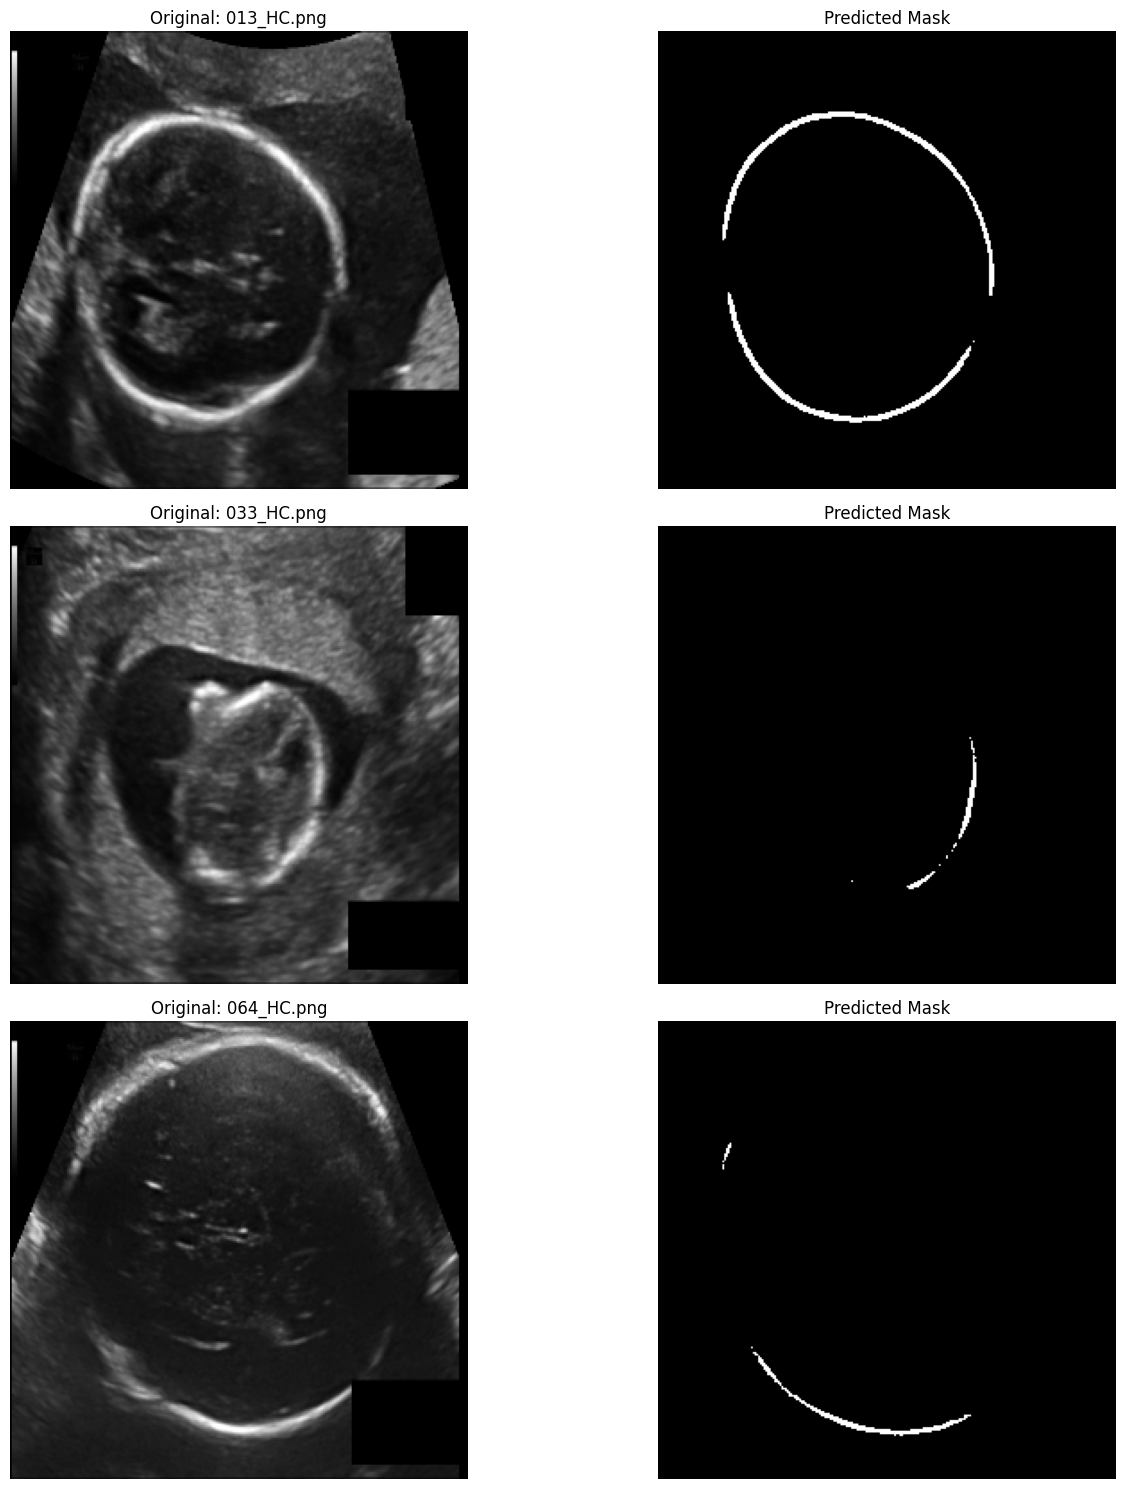


Saving to Google Drive...
Mounted at /content/drive

Summary:
- Test images found: 335
- Successfully processed: 335
- Predictions saved locally at: /content/test_predictions
- Predictions copied to Drive at: /content/drive/MyDrive/HRNet_Predictions


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# 1. Verify test directory
test_image_dir = '/content/data/test/images'
print(f"Checking test directory: {test_image_dir}")

if not os.path.exists(test_image_dir):
    raise FileNotFoundError(f"Test directory not found at {test_image_dir}")

# List test files - now looking for PNGs
test_files = [f for f in os.listdir(test_image_dir) if f.lower().endswith('.png')]
print(f"Found {len(test_files)} test images")

if len(test_files) == 0:
    print("Available files in directory:")
    print(os.listdir(test_image_dir))
    raise ValueError("No PNG files found in test directory")

# 2. Load model
def load_custom_model(model_path):
    custom_objects = {
        'dice_coef': dice_coef,
        'dice_loss': dice_loss,
        'bce_dice_loss': bce_dice_loss
    }
    return load_model(model_path, custom_objects=custom_objects, compile=False)

best_model_path = '/content/results/fold_3_best_model.h5'  # Update this path
print(f"\nLoading model from: {best_model_path}")

if not os.path.exists(best_model_path):
    raise FileNotFoundError(f"Model not found at {best_model_path}")

model = load_custom_model(best_model_path)
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_coef, 'accuracy'])

# 3. Set up output directories
output_dir = '/content/test_predictions'
os.makedirs(output_dir, exist_ok=True)

# 4. Modified preprocessing for PNG files
def preprocess_image(image_path, target_size=(256, 256)):
    try:
        print(f"\nProcessing: {image_path}")
        img = imread(image_path)

        # Ensure the image is in RGB format
        if len(img.shape) == 2:  # If grayscale, convert to RGB
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 4:  # If RGBA, convert to RGB
            img = img[..., :3]  # Keep only the first 3 channels (RGB)

        print(f"Original shape: {img.shape}, dtype: {img.dtype}, range: [{np.min(img)}, {np.max(img)}]")

        # Resize if needed
        if img.shape[:2] != target_size: #Resize to target size for the first 2 dims (h,w)
            print(f"Resizing from {img.shape[:2]} to {target_size}")
            img = tf.image.resize(img, target_size).numpy()

        # Normalize to [0, 1]
        img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-7)
        print(f"After normalization - range: [{np.min(img):.2f}, {np.max(img):.2f}]")

        print(f"Final shape: {img.shape}")
        return img
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None

# 5. Process test images
results = []
for filename in tqdm(test_files, desc="Processing test images"):
    image_path = os.path.join(test_image_dir, filename)
    img = preprocess_image(image_path)

    if img is not None:
        # Predict
        pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)

        # Save
        output_path = os.path.join(output_dir, filename)
        imsave(output_path, pred_mask.squeeze(), check_contrast=False)
        results.append((image_path, img, pred_mask))

# 6. Visualization
if len(results) > 0:
    print("\nSample predictions:")
    plt.figure(figsize=(15, 5*min(3, len(results))))
    for i, (img_path, img, mask) in enumerate(results[:3]):
        plt.subplot(min(3, len(results)), 2, 2*i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"Original: {os.path.basename(img_path)}")
        plt.axis('off')

        plt.subplot(min(3, len(results)), 2, 2*i+2)
        plt.imshow(mask.squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo valid results to display")

# 7. Save to Drive
print("\nSaving to Google Drive...")
drive.mount('/content/drive', force_remount=True)
drive_pred_dir = '/content/drive/MyDrive/HRNet_Predictions'
os.makedirs(drive_pred_dir, exist_ok=True)

for filename in os.listdir(output_dir):
    if filename.lower().endswith('.png'):
        src = os.path.join(output_dir, filename)
        dst = os.path.join(drive_pred_dir, filename)
        shutil.copy(src, dst)

print(f"\nSummary:")
print(f"- Test images found: {len(test_files)}")
print(f"- Successfully processed: {len(results)}")
print(f"- Predictions saved locally at: {output_dir}")
print(f"- Predictions copied to Drive at: {drive_pred_dir}")

In [ ]:
def calculate_metrics(y_true, y_pred):
    # Threshold predictions
    y_pred = (y_pred > 0.5).astype(np.float32)
    y_true = y_true.astype(np.float32)

    # Calculate metrics
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection

    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-7)
    iou = intersection / (union + 1e-7)
    accuracy = np.mean(y_true == y_pred)

    # Precision, Recall, F1
    true_pos = intersection
    false_pos = np.sum(y_pred) - intersection
    false_neg = np.sum(y_true) - intersection

    precision = true_pos / (true_pos + false_pos + 1e-7)
    recall = true_pos / (true_pos + false_neg + 1e-7)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-7)

    return {
        'Dice': dice,
        'IoU': iou,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }

# Example usage when you have masks:
# metrics = calculate_metrics(true_mask, pred_mask)

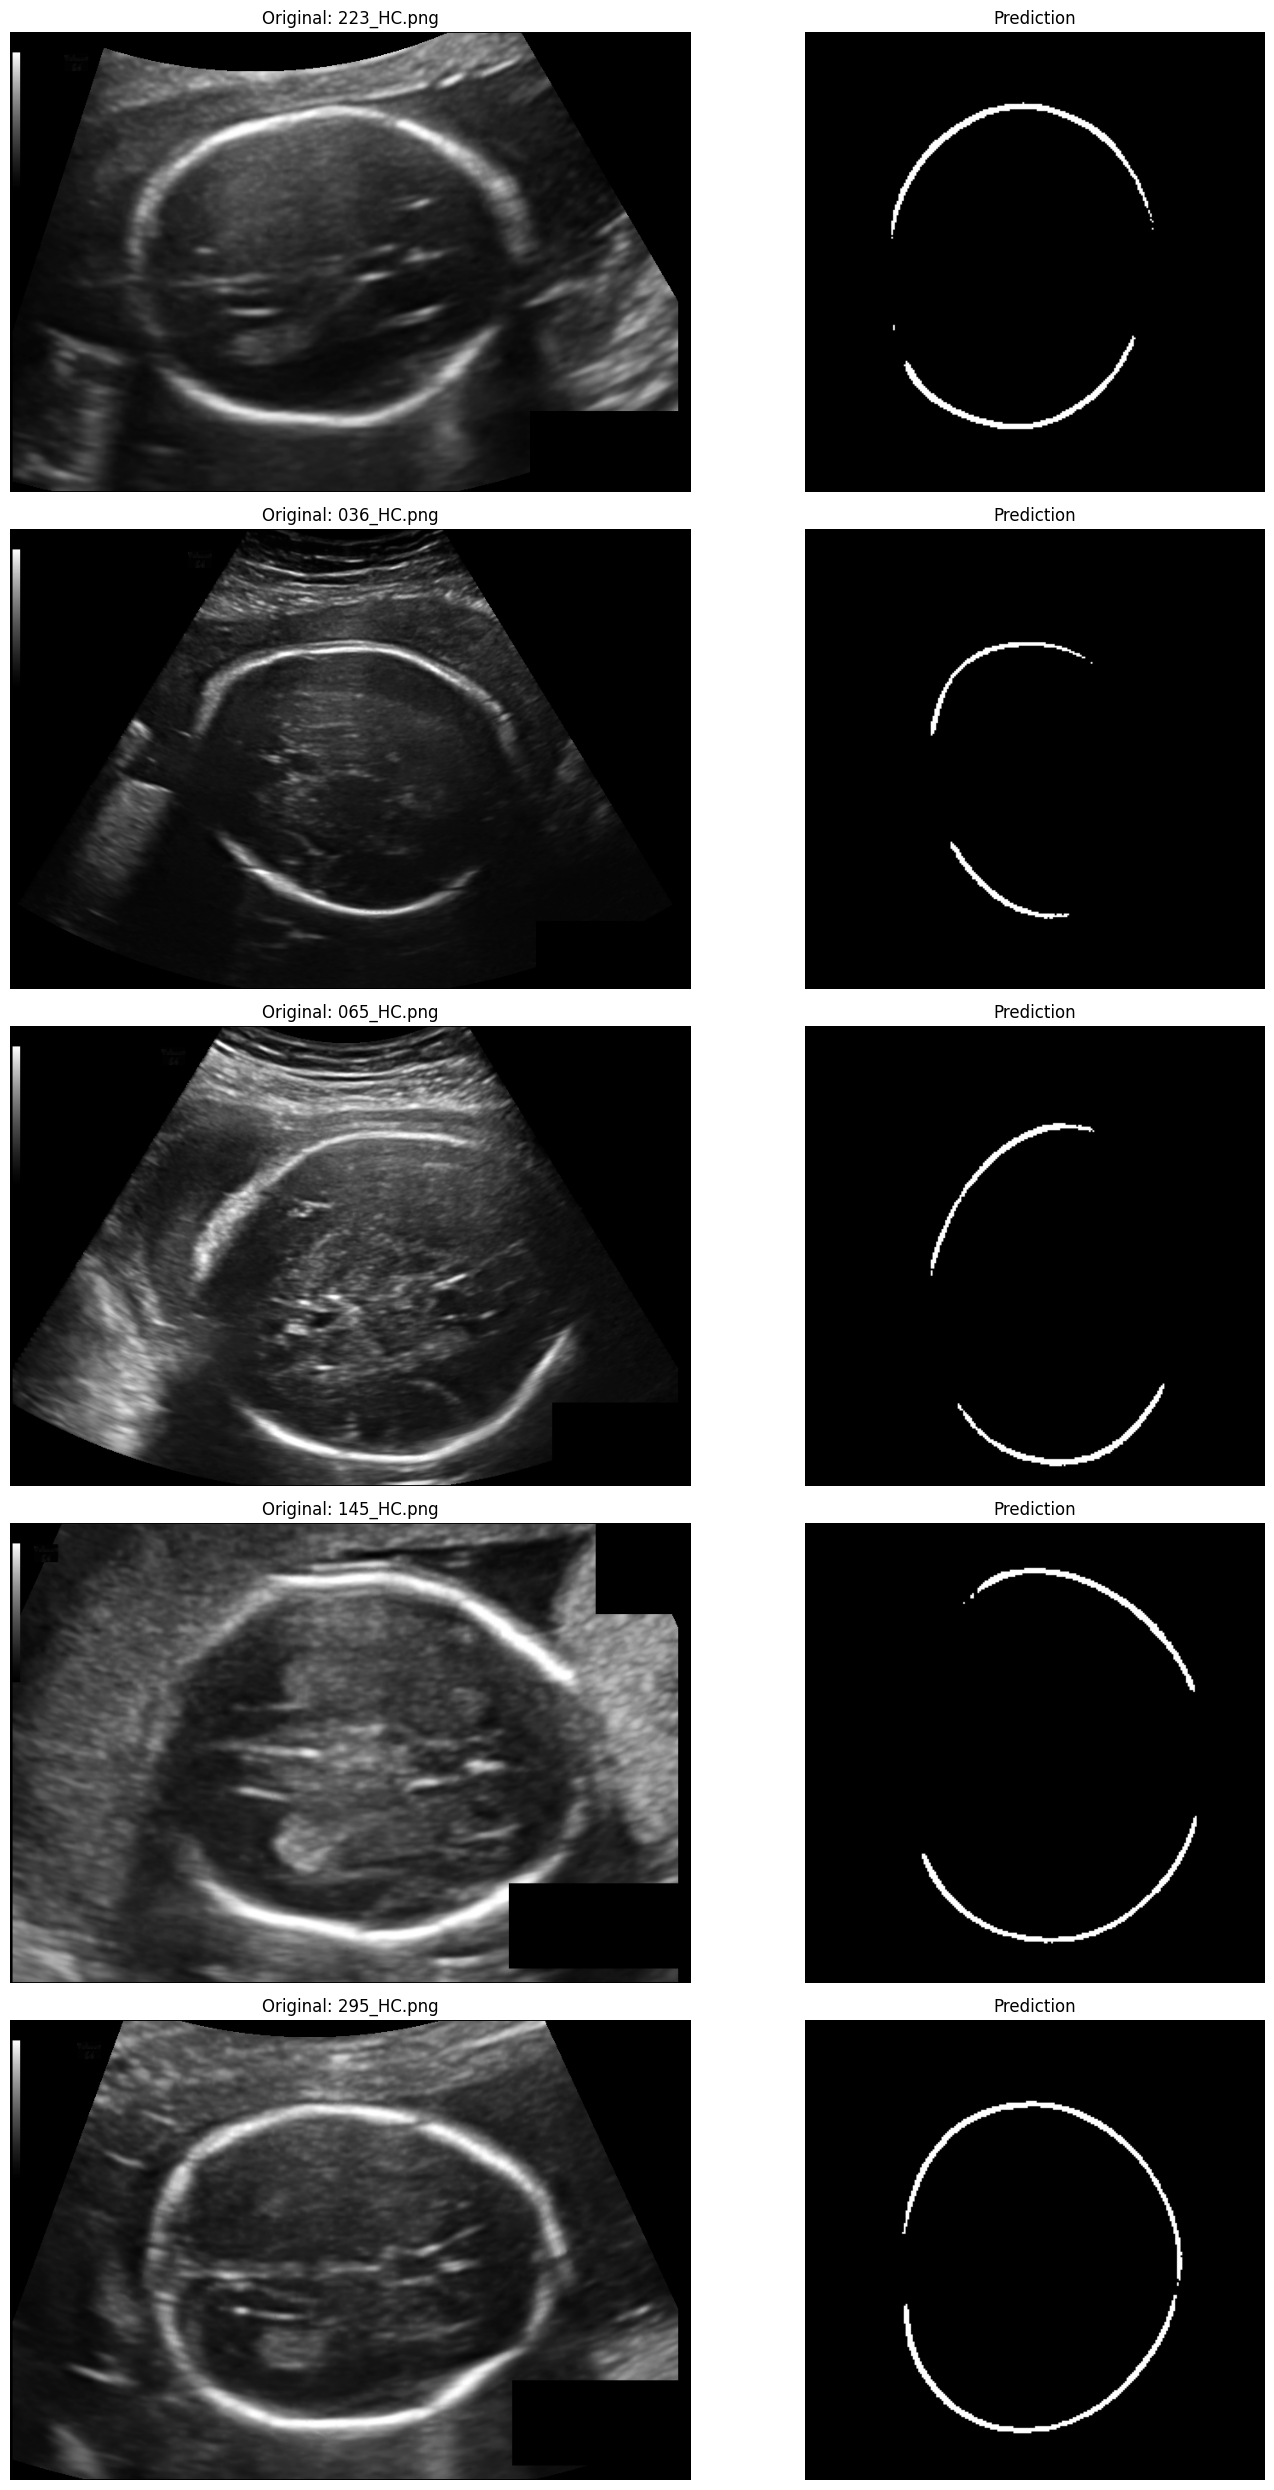

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

def visualize_predictions(test_dir, pred_dir, num_samples=5):
    test_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]
    samples = np.random.choice(test_files, min(num_samples, len(test_files)), replace=False)

    plt.figure(figsize=(15, 5*num_samples))
    for i, filename in enumerate(samples):
        # Load original and prediction
        original = imread(os.path.join(test_dir, filename))
        prediction = imread(os.path.join(pred_dir, filename))

        # Plot
        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(prediction, cmap='gray')
        plt.title("Prediction")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
visualize_predictions('/content/data/test/images', '/content/test_predictions')

In [ ]:
def evaluate_predictions(test_dir, pred_dir, mask_dir):
    test_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]
    metrics = []

    for filename in tqdm(test_files, desc="Evaluating"):
        try:
            # Load images
            pred = imread(os.path.join(pred_dir, filename)) / 255.0
            true = imread(os.path.join(mask_dir, filename)) / 255.0

            # Calculate metrics
            results = calculate_metrics(true, pred)
            metrics.append(results)

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

    # Aggregate results
    avg_metrics = {k: np.mean([m[k] for m in metrics]) for k in metrics[0].keys()}

    # Print results
    print("\n=== Evaluation Metrics ===")
    for k, v in avg_metrics.items():
        print(f"{k}: {v:.4f}")

    # Visualization
    visualize_predictions(test_dir, pred_dir)

    return avg_metrics

# Example usage (when you have masks):
# evaluate_predictions('/content/data/test/images',
#                     '/content/test_predictions',
#                     '/content/data/test/masks')

In [ ]:
def save_overlay_images(test_dir, pred_dir, output_dir, alpha=0.4):
    os.makedirs(output_dir, exist_ok=True)

    for filename in tqdm(os.listdir(test_dir)):
        if filename.endswith('.png'):
            # Load images
            original = imread(os.path.join(test_dir, filename))
            prediction = imread(os.path.join(pred_dir, filename))

            # Create overlay
            if len(original.shape) == 2:
                original_rgb = np.stack([original]*3, axis=-1)
            else:
                original_rgb = original.copy()

            # Resize prediction to match original image size
            prediction = cv2.resize(prediction, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)

            overlay = original_rgb.copy()
            overlay[prediction > 0] = [0, 255, 0]  # Green

            blended = (original_rgb * (1-alpha) + overlay * alpha).astype(np.uint8)

            # Save
            output_path = os.path.join(output_dir, f"overlay_{filename}")
            plt.imsave(output_path, blended)

# Usage
save_overlay_images('/content/data/test/images',
                   '/content/test_predictions',
                   '/content/overlay_results')

100%|██████████| 335/335 [00:38<00:00,  8.78it/s]


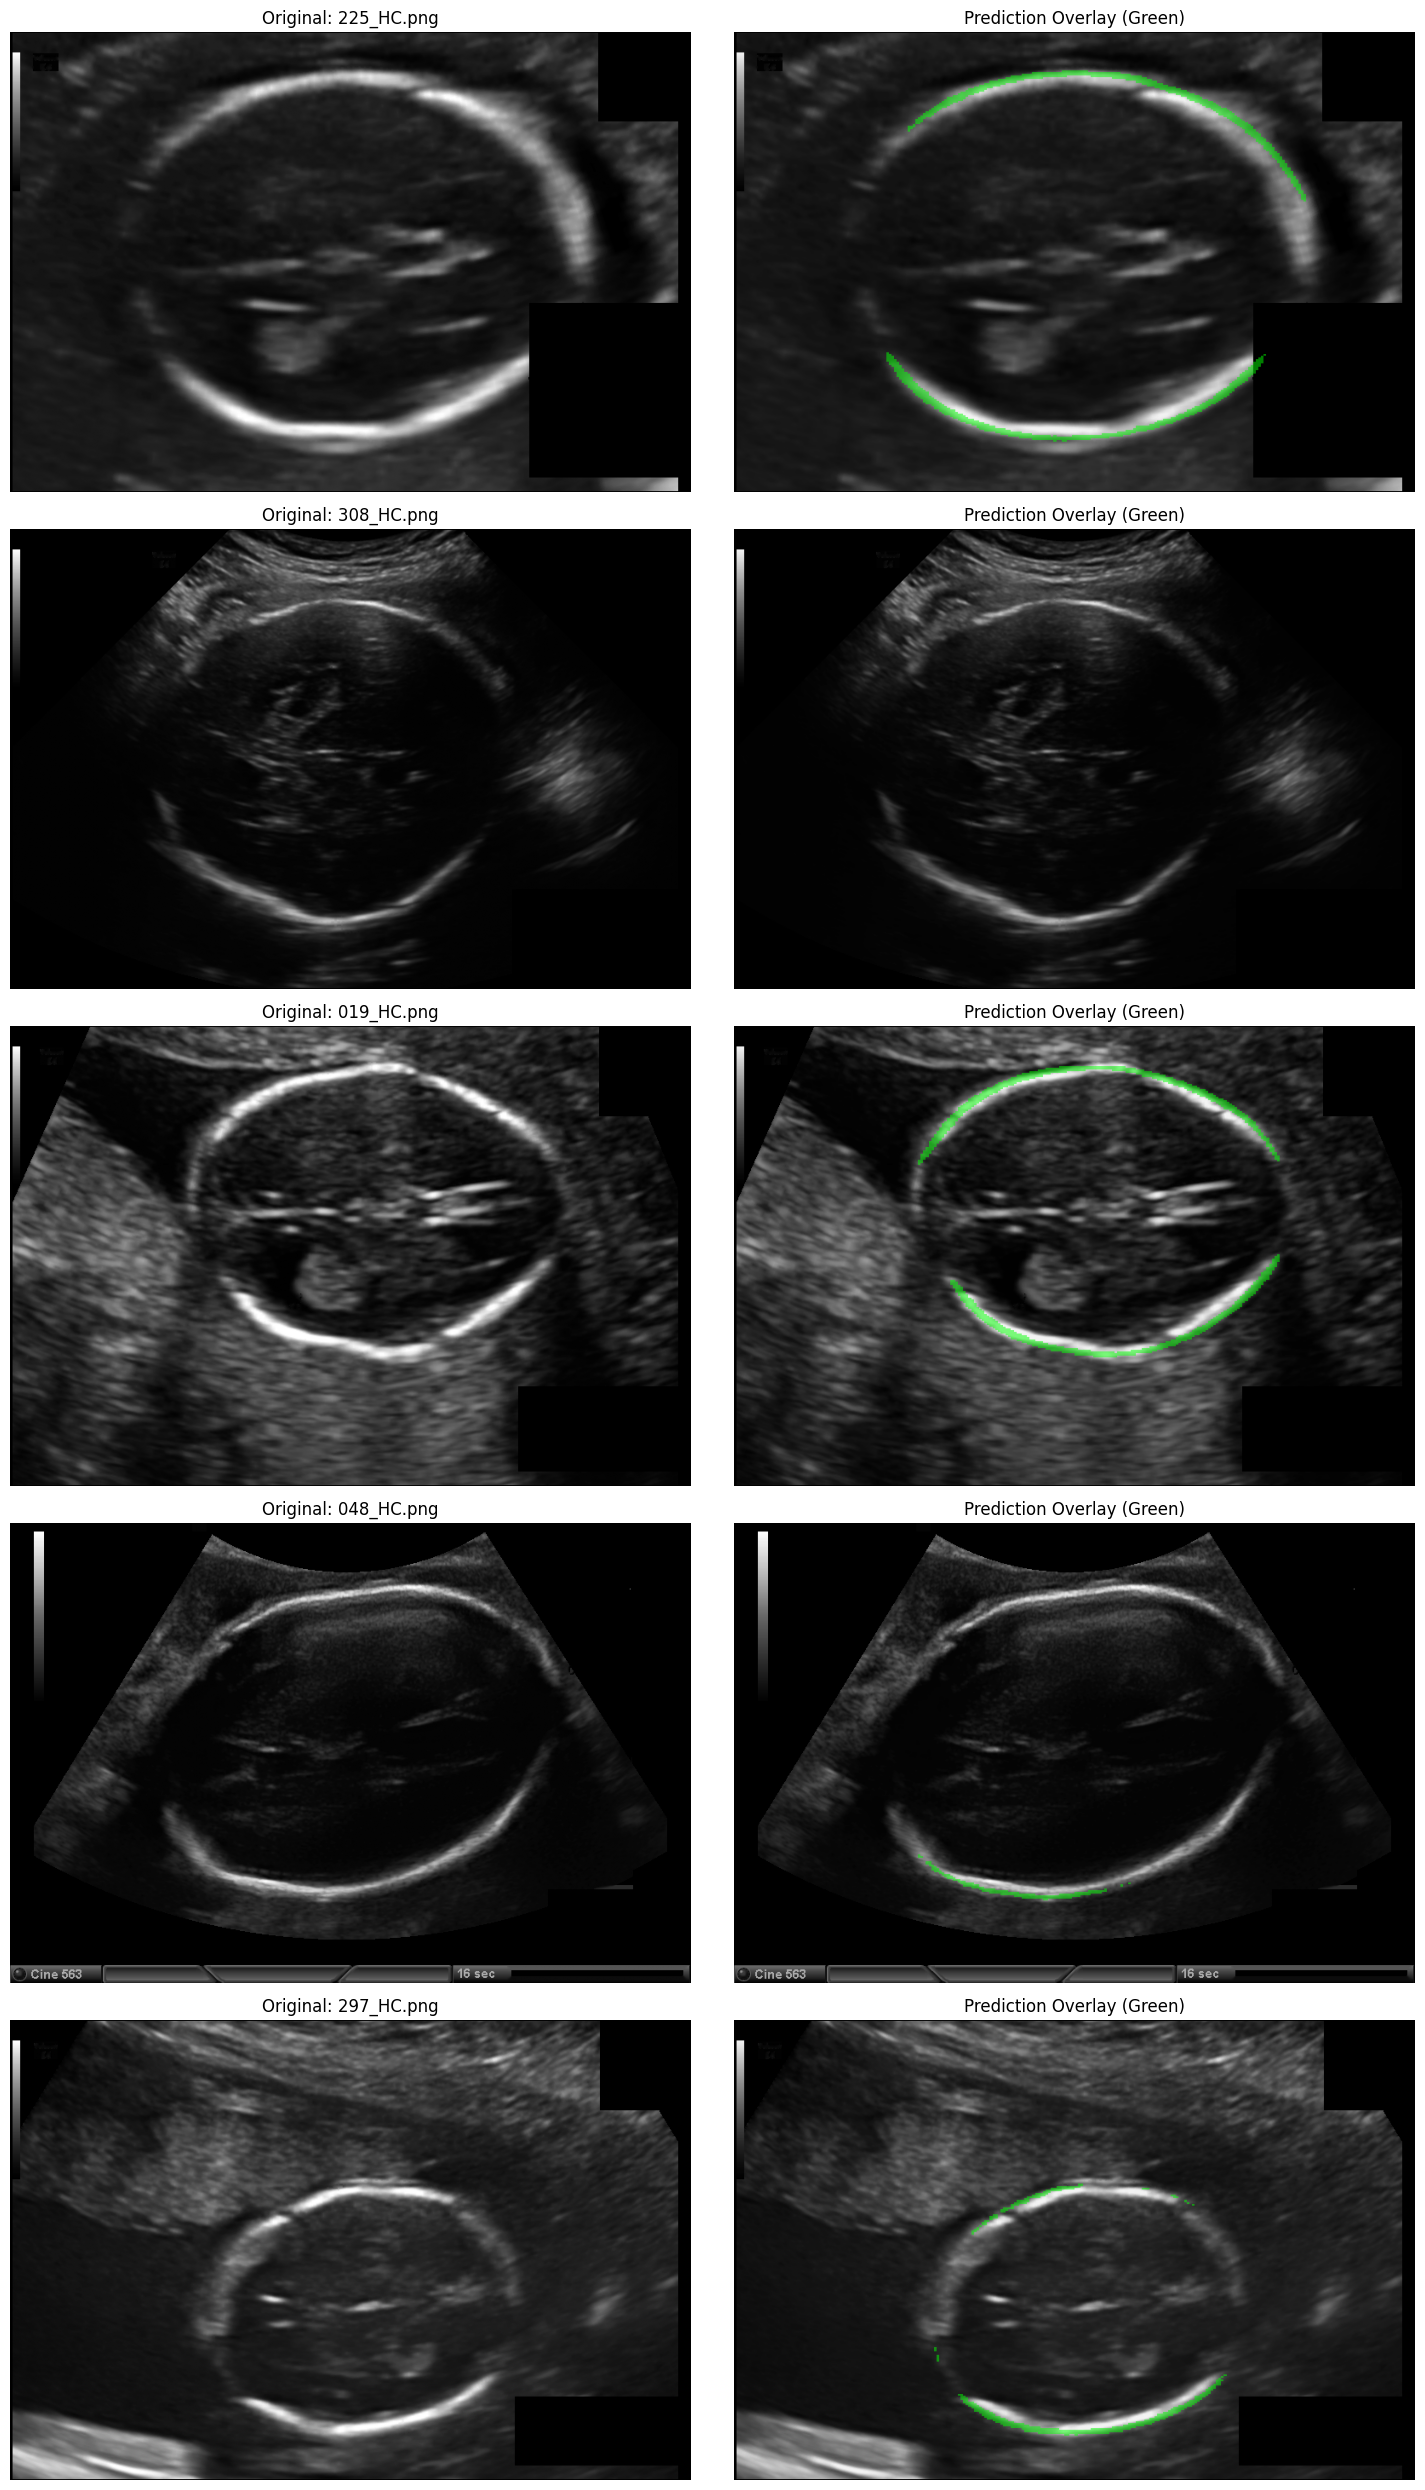

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import os

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import os
import cv2  # Import cv2 for resizing

def overlay_predictions(test_dir, pred_dir, num_samples=5, alpha=0.4):
    test_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]
    samples = np.random.choice(test_files, min(num_samples, len(test_files)), replace=False)

    plt.figure(figsize=(15, 5*num_samples))
    for i, filename in enumerate(samples):
        # Load images
        original = imread(os.path.join(test_dir, filename))
        prediction = imread(os.path.join(pred_dir, filename))

        # Resize prediction to match original image size
        prediction = cv2.resize(prediction, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Create RGB version of original if grayscale
        if len(original.shape) == 2:
            original_rgb = np.stack([original]*3, axis=-1)
        else:
            original_rgb = original.copy()

        # Create green overlay
        overlay = original_rgb.copy()
        overlay[prediction > 0] = [0, 255, 0]  # Green for mask

        # Blend overlay
        blended = (original_rgb * (1-alpha) + overlay * alpha).astype(np.uint8)

        # Plot
        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(blended)
        plt.title("Prediction Overlay (Green)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
overlay_predictions('/content/data/test/images', '/content/test_predictions', alpha=0.5)